# Walmart Case Study

*  Analyzing the customer purchase behavior (specifically, purchase amount) against the customer's gender and the various other factors to help the business make better decisions.

*  Understand the spending behaviour of both male and female to help business make right decisions.

  *  Do women spend more on Black Friday than men?

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

--2024-02-21 13:27:19--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  84.9MB/s    in 0.3s    

2024-02-21 13:27:20 (84.9 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



# General Analysis

In [3]:
df = pd.read_csv("walmart_data.csv")
df.shape

(550068, 10)

**Insights/Conclusion:** Dataset has 550068 rows and 10 columns.


In [4]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Insights/Conclusion:**

* **Object Datatypes:** `Product_ID`, `Gender`, `Age`, `City_Category` and `Stay_In_Current_City_Years` columns store categorical data.

* **Integer Datatypes:** `User_ID`, `Occupation`, `Marital_Status`, `Product_Category` and `Purchase` columns hold numerical values.

## Checking missing values

In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Insights/Conclusion:** The dataset is complete, containing no null, missing or duplicate values across all columns.

## Unique value counts for each feature

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**Insights/Conclusion:** Out of 550068 data points, only 5891 unique `User_ID` were found, suggesting that some users made multiple purchases.

## Converting numerical columns to Categorical columns

In [10]:
# Converting numerical categorical columns 'User_ID' and 'Marital_Status' to object datatype

columns=['User_ID', 'Marital_Status']
df[columns]=df[columns].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 42.0+ MB


**Insights/Conclusion:**

* **Categorical columns:** `User_ID`, `Product_ID`, `Gender`, `Age`, `City_Category`, `Stay_In_Current_City_Years` and `Marital_Status`.

* **Numerical Categorical columns:** `Occupation` and `Product_Category`.

* **Continuous column:** `Purchase`

## Statistical summary

In [12]:
df.describe(include='all')

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count    550068.0     550068  550068  550068  550068.000000        550068   
unique     5891.0       3631       2       7            NaN             3   
top     1001680.0  P00265242       M   26-35            NaN             B   
freq       1026.0       1880  414259  219587            NaN        231173   
mean          NaN        NaN     NaN     NaN       8.076707           NaN   
std           NaN        NaN     NaN     NaN       6.522660           NaN   
min           NaN        NaN     NaN     NaN       0.000000           NaN   
25%           NaN        NaN     NaN     NaN       2.000000           NaN   
50%           NaN        NaN     NaN     NaN       7.000000           NaN   
75%           NaN        NaN     NaN     NaN      14.000000           NaN   
max           NaN        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068        550068.0     550068.000000   
unique                          5             2.0               NaN   
top                             1             0.0               NaN   
freq                       193821        324731.0               NaN   
mean                          NaN             NaN          5.404270   
std                           NaN             NaN          3.936211   
min                           NaN             NaN          1.000000   
25%                           NaN             NaN          1.000000   
50%                           NaN             NaN          5.000000   
75%                           NaN             NaN          8.000000   
max                           NaN             NaN         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

**Insights/Conclusion:**

* 5891 unique users are there in the dataset. Customer `1001680` has purchased more than others.
* 3631 unique products are there in the dataset with `P00265242` being the most sold product.
* Male shoppers dominate in terms of purchasing.
* Prime purchasers fall within the 26-35 age bracket.
* 21 distinct Occupations are there in the dataset.
* 3 unique City categories are there with category B being the highest.
*  5 unique values for `Stay_In_Current_City_Years` with 1 being the highest.
* 20 different Product Categories are there in the dataset.
* With an average purchase of \$9263.96 and a maximum purchase of \$23961, outliers significantly impact the mean, suggesting the maximum value is an outlier.

# Univariate Analysis

In [13]:
# How many users are there in the dataset?

df['User_ID'].nunique()

5891

In [14]:
# How many unique Products are there in the dataset?

df['Product_ID'].nunique()

3631

In [15]:
# How many unique Product Categories are there in the dataset?

df['Product_Category'].nunique()

20

In [16]:
# How many distinct Occupations are there?

df['Occupation'].nunique()

21

In [17]:
variables = ['Gender', 'City_Category', 'Marital_Status', 'Age',
             'Stay_In_Current_City_Years', 'Product_Category', 'Occupation']

for var in variables:
    value_counts = df[var].value_counts()
    percentages = (value_counts / len(df)) * 100
    var_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    print(f"Value counts for '{var}':")
    print(var_df)
    print("\n")

Value counts for 'Gender':
    Count  Percentage
M  414259   75.310507
F  135809   24.689493


Value counts for 'City_Category':
    Count  Percentage
B  231173   42.026259
C  171175   31.118880
A  147720   26.854862


Value counts for 'Marital_Status':
    Count  Percentage
0  324731   59.034701
1  225337   40.965299


Value counts for 'Age':
        Count  Percentage
26-35  219587   39.919974
36-45  110013   19.999891
18-25   99660   18.117760
46-50   45701    8.308246
51-55   38501    6.999316
55+     21504    3.909335
0-17    15102    2.745479


Value counts for 'Stay_In_Current_City_Years':
     Count  Percentage
1   193821   35.235825
2   101838   18.513711
3    95285   17.322404
4+   84726   15.402823
0    74398   13.525237


Value counts for 'Product_Category':
     Count  Percentage
5   150933   27.438971
1   140378   25.520118
8   113925   20.711076
11   24287    4.415272
2    23864    4.338373
6    20466    3.720631
3    20213    3.674637
4    11753    2.136645
16    9828   

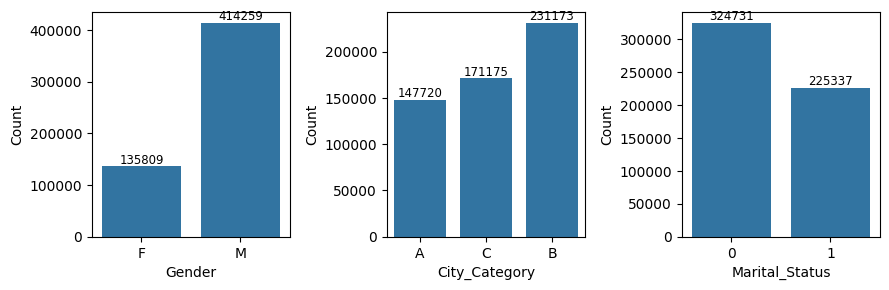

In [18]:
variables = ['Gender', 'City_Category', 'Marital_Status']

# Create subplots for count plots of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(9, 3))

for i, var in enumerate(variables):
    ax=sns.countplot(x=var, data=df, ax=axes[i])
    ax.bar_label(ax.containers[0], fontsize=8.5)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

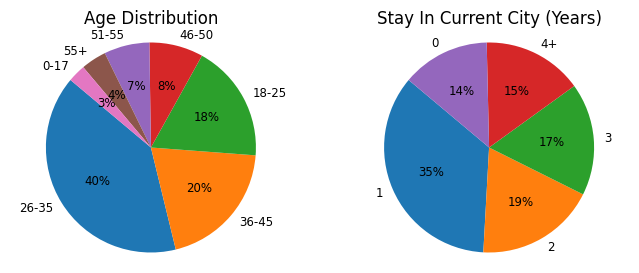

In [19]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.pie(df['Age'].value_counts(), labels=df['Age'].value_counts().index, autopct='%0.0f%%', startangle=140, textprops={'fontsize': 8.5})
plt.title('Age Distribution')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(df['Stay_In_Current_City_Years'].value_counts(), labels=df['Stay_In_Current_City_Years'].value_counts().index, autopct='%0.0f%%', startangle=140, textprops={'fontsize': 8.5})
plt.title('Stay In Current City (Years)')
plt.axis('equal')

plt.show()

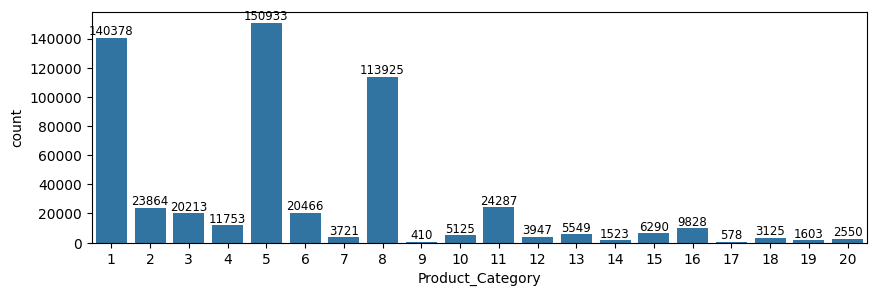

In [20]:
plt.figure(figsize=(10, 3))
ax = sns.countplot(data=df, x='Product_Category')
ax.bar_label(ax.containers[0], fontsize=8.5)
plt.show()

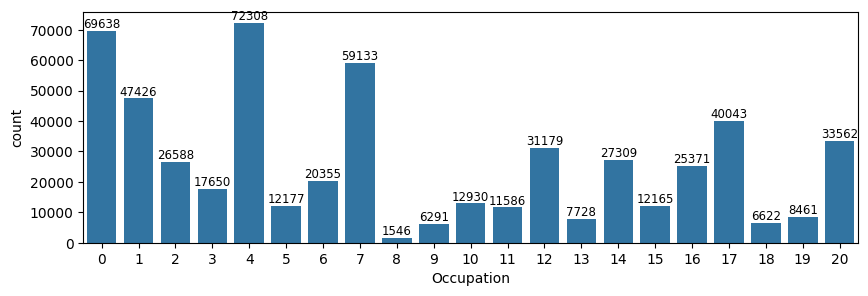

In [21]:
plt.figure(figsize=(10, 3))
ax = sns.countplot(data=df, x='Occupation')
ax.bar_label(ax.containers[0], fontsize=8.5)
plt.show()

**Insights/Conclusion:**

* 75% of the users are Male and 25% are Female.

* 27\% of the users belongs to City category A, 42\% belongs to City category B and 31\% belongs to City category C.

* 60\% users are Single and rest 40\% are Married.

* Across seven unique age groups, 40\% purchase lie in 26-35 age bracket, 20\% in 36-45 age bracket and 18\% in 18-25 age bracket.

* 35\% stay in a city for 1 year, 18\% stay in a city for 2 years, 17\% stay in a city for 3 years
and 15\% stay in a city for 4+ years.

* The product categories 5, 1 and 8 have the highest purchase.

* Occupations like 4, 0 and 7 has contributed more towards total purchase amount.

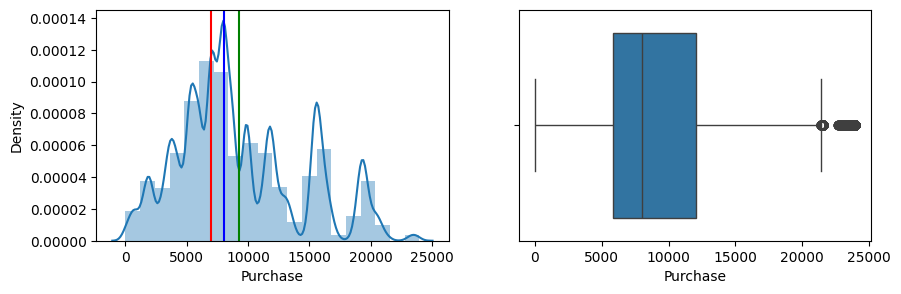

In [22]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.distplot(a=df['Purchase'], bins=20, kde=True)
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="b")
plt.axvline(df["Purchase"].mode()[0],color="r")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.show()

**Insights/Conclusion:**

* While observing the distribution of purchase amount, it is quite obvious that the distribution is right skewed means majority of data concentrated on left side.
* Majority of customer purchase within 5000 - 20000 range.
* There are outliers in purchase amount.

## Detecting & Handling Outliers

In [23]:
# Calculate the first and third quartiles
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter outliers
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]['Purchase']

print(f'Number of Outliers: {len(outliers)}')
print(f'Minimum Outliers value: {outliers.min()}')
print(f'Maximum Outliers value: {outliers.max()}')

Number of Outliers: 2677
Minimum Outliers value: 21401
Maximum Outliers value: 23961


**Insights/Conclusion:** 2677 outliers are present in `Purchase` column.

In [24]:
# Clip the data between the 5th and 95th percentiles
df['Purchase'] = df['Purchase'].clip(lower_bound, upper_bound)

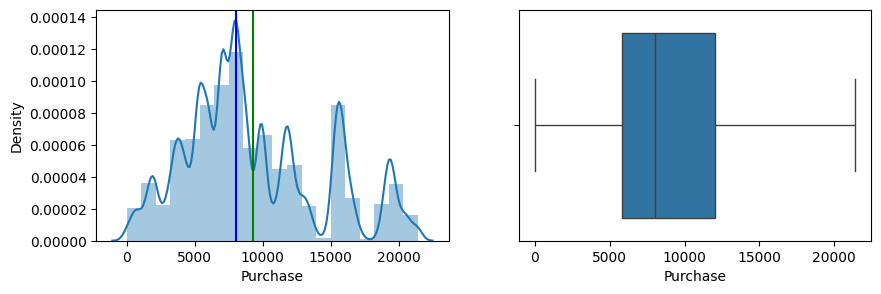

In [25]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.distplot(a=df['Purchase'], bins=20, kde=True)
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="b")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.show()

**Insights/Conclusion:** Outliers has been clipped now.

# Bivariate Analysis

### What is the distribution of purchase amounts between genders, and how does it vary?

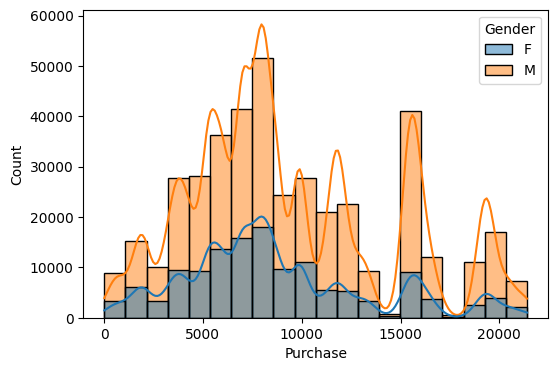

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(x='Purchase', hue='Gender', data=df, bins=20, kde=True)
plt.show()

**Insights/Conclusion:** Both genders exhibit similar spending behavior, with the majority of purchases falling between 5000-10000, but males make more purchases overall.

### How does purchase amount vary across different demographic and occupational factors?

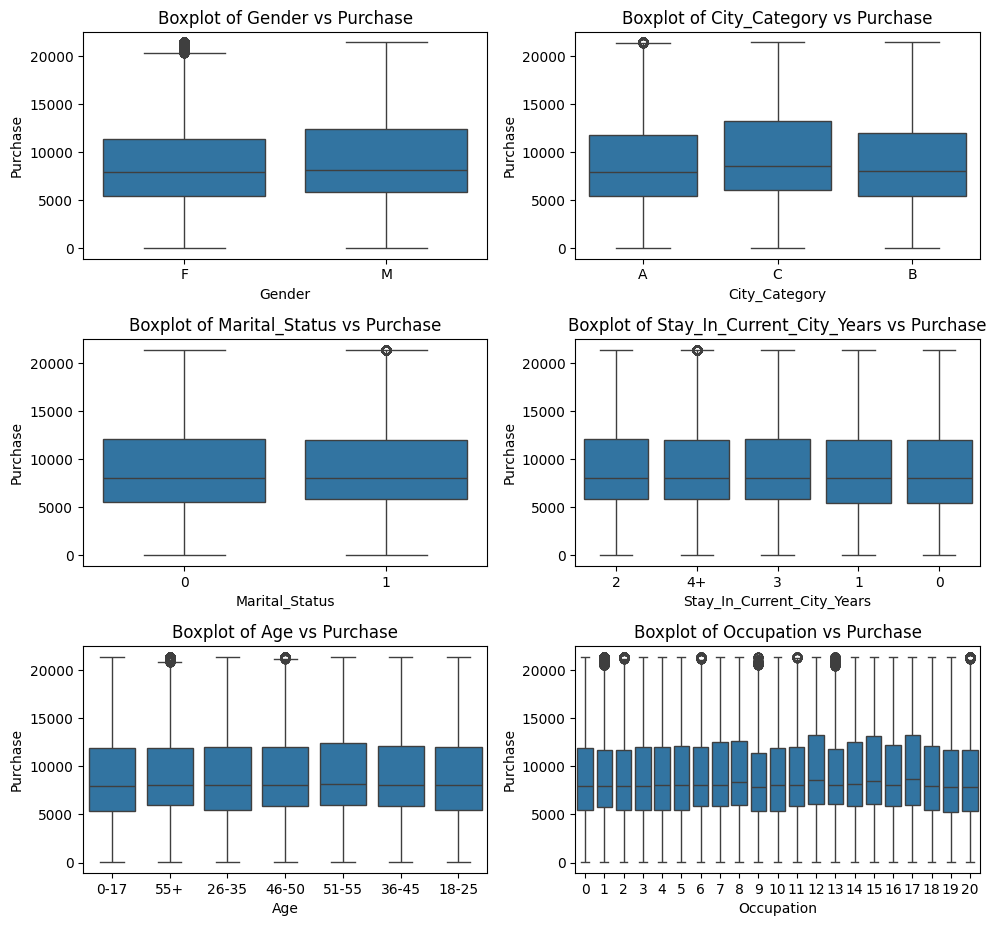

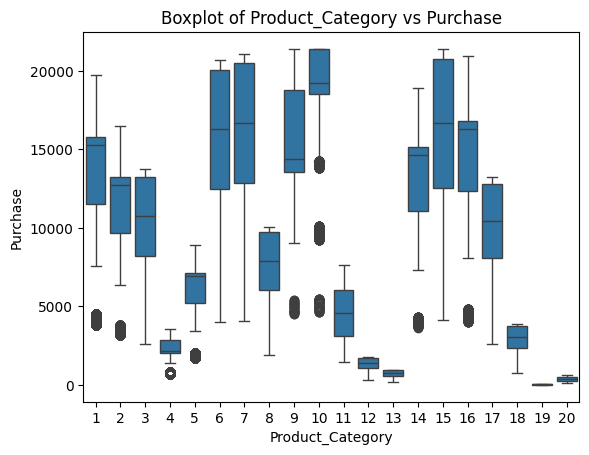

In [27]:
variables = ['Gender', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years', 'Age','Occupation']

plt.figure(figsize=(10, 12))
for i, col in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=col, y='Purchase', data=df)
    plt.title(f'Boxplot of {col} vs Purchase')
plt.tight_layout()
plt.show()

sns.boxplot(x='Product_Category', y='Purchase', data=df)
plt.title(f'Boxplot of Product_Category vs Purchase')
plt.show()

**Insights/Conclusion:**

* Male and female spending patterns are alike; males tend to spend slightly more.
* Purchase behavior remains consistent across age groups, centered around 5k to 12k with outliers.
* Occupation and purchase values show similar trends.
* City category, years in current city, and marital status correlate with spending in the 5k to 12k range.
* Product categories vary in purchases, with Category 10 being the most expensive and some categories having outliers.

### How does gender distribution vary across different demographic factors such as age, city category, marital status, and duration of stay in the current city?

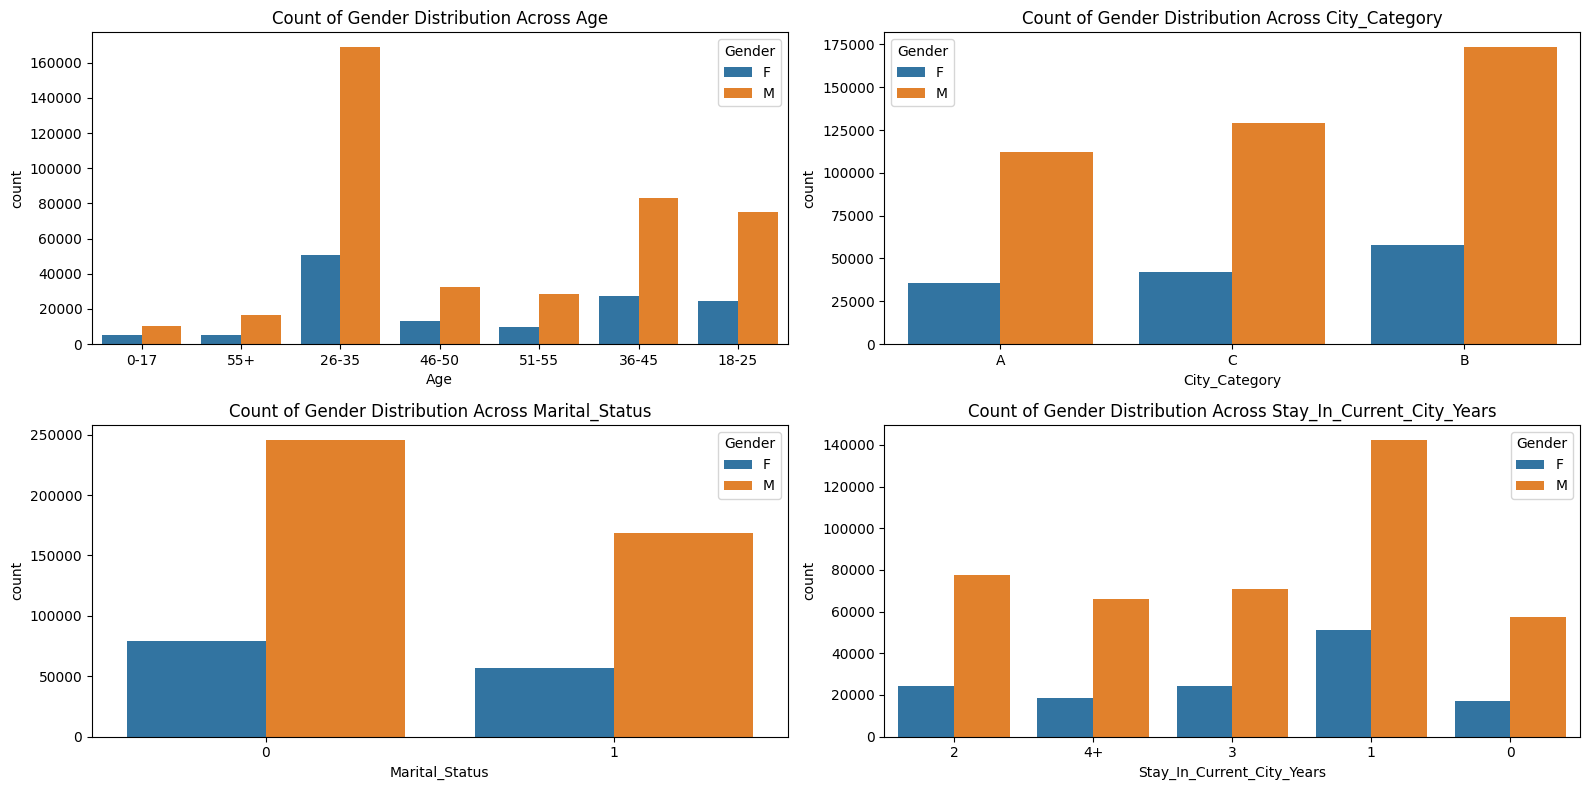

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.countplot(data=df, x='Age', hue='Gender', ax=axs[0,0])
axs[0,0].set_title(f'Count of Gender Distribution Across Age')

sns.countplot(data=df, x='City_Category', hue='Gender', ax=axs[0,1])
axs[0,1].set_title(f'Count of Gender Distribution Across City_Category')

sns.countplot(data=df, x='Marital_Status', hue='Gender', ax=axs[1,0])
axs[1,0].set_title(f'Count of Gender Distribution Across Marital_Status')

sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Gender', ax=axs[1,1])
axs[1,1].set_title(f'Count of Gender Distribution Across Stay_In_Current_City_Years')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**

* Most of female customers are from city category C.
* Most of female customer stay 1 year in the current city.
* Most of the customers are in range 18-45 age bracket.
* There is huge difference in the male and female customer for age bracket 26-35.
* Male customers predominantly single, while female marital status shows less variation.

### Are there preferred product categories for different genders?

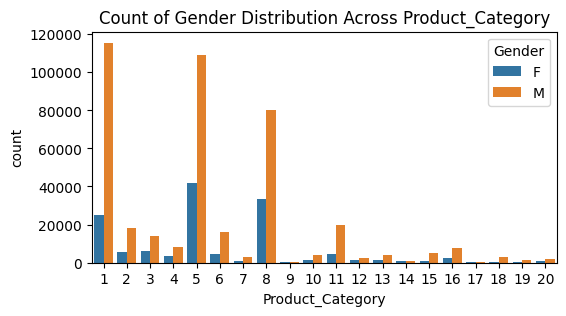

In [29]:
plt.figure(figsize=(6, 3))

sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.title(f'Count of Gender Distribution Across Product_Category')
plt.show()

**Insights/Conclusion:**

* Product Category 5 and 8 are demanding among female customers.
* Proudct Category 1 and 5 are most demanding among male customers.

### What is the distribution of gender across different occupations?

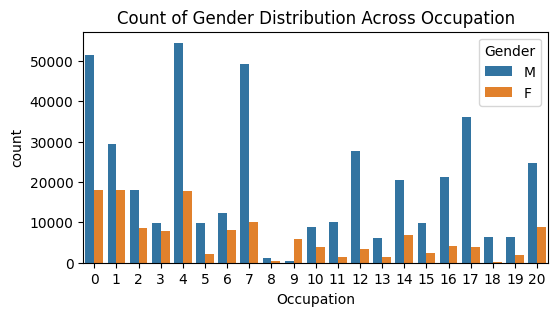

In [30]:
plt.figure(figsize=(6, 3))

sns.countplot(data=df, x='Occupation', hue='Gender')
plt.title(f'Count of Gender Distribution Across Occupation')
plt.show()

**Insights/Conclusion:**

* Most female customers belongs to occupation 0, 1 and 4.
* Most male customers belongs to occupation 0, 4 and 7.

# Multivariate Analysis

### How does gender influence purchasing behavior across different demographic factors such as age, city category, marital status, and duration of stay in the current city?

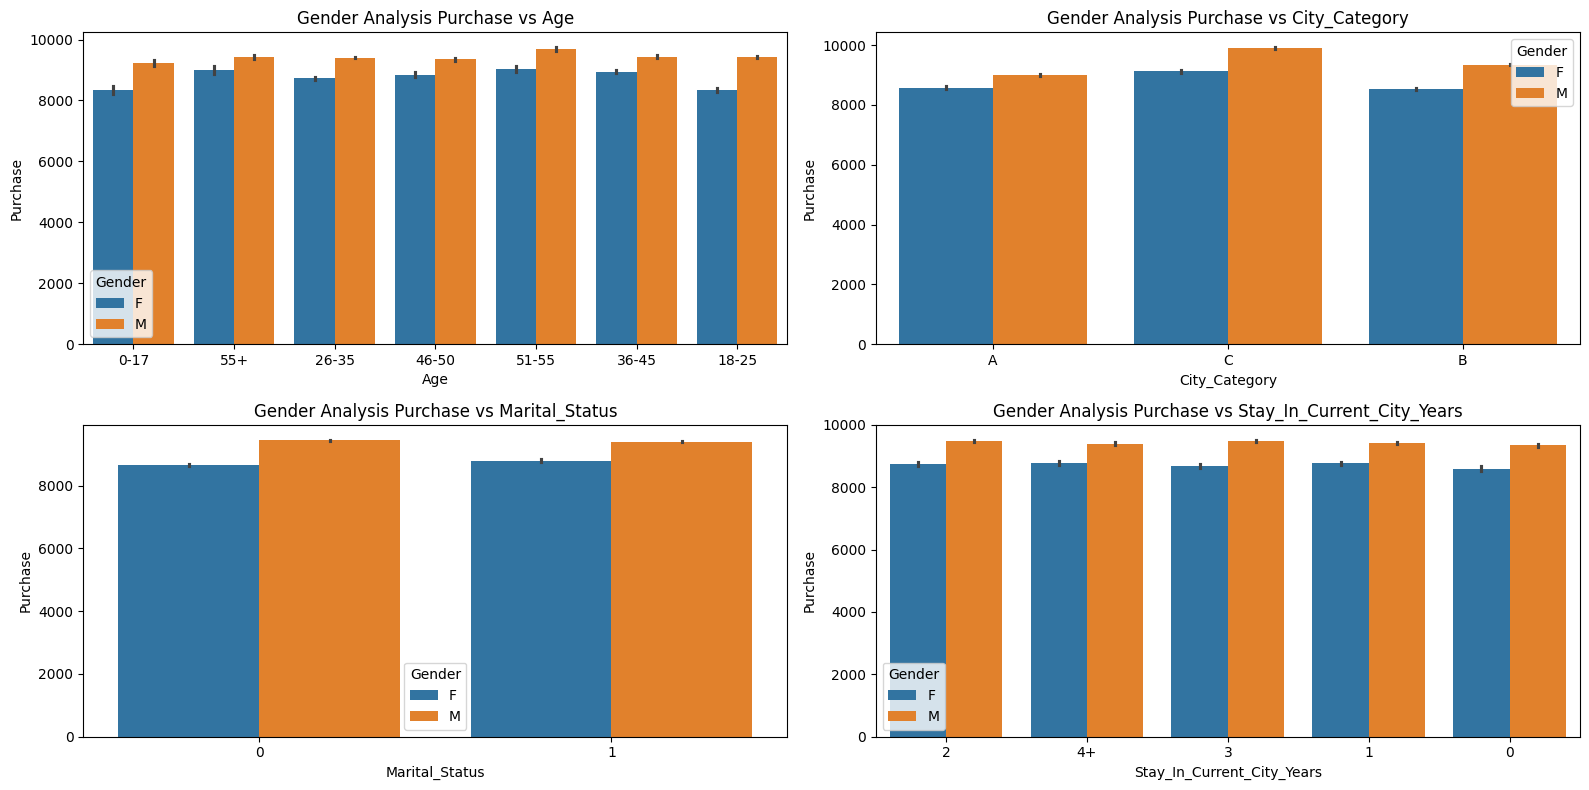

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.barplot(data=df, y='Purchase', x='Age', hue='Gender', ax=axs[0,0])
axs[0,0].set_title(f'Gender Analysis Purchase vs Age')

sns.barplot(data=df, y='Purchase', x='City_Category', hue='Gender', ax=axs[0,1])
axs[0,1].set_title(f'Gender Analysis Purchase vs City_Category')

sns.barplot(data=df, y='Purchase', x='Marital_Status', hue='Gender', ax=axs[1,0])
axs[1,0].set_title(f'Gender Analysis Purchase vs Marital_Status')

sns.barplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Gender', ax=axs[1,1])
axs[1,1].set_title(f'Gender Analysis Purchase vs Stay_In_Current_City_Years')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**

* Purchases in city category C are slightly higher than other categories.
* Purchasing patterns are similar for Age group, Marital status and Years in current city.
* Males tending to buy slightly higher-value products.


### How does the purchasing behavior vary across different age groups within each city category?

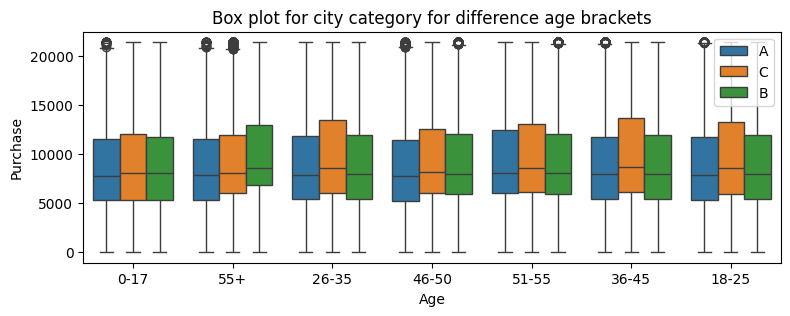

In [32]:
plt.figure(figsize=(9, 3))

sns.boxplot(data=df, x='Age', y='Purchase', hue='City_Category')
plt.title(f'Box plot for city category for difference age brackets')
plt.legend(loc='upper right')
plt.show()

**Insights/Conclusion:**

* Product Category B is favored by those aged 55+.
* Product Category A & B are quite same in demand among other age groups except 55+.
* Product Category C is in demand for age group 18-45 and slightly in 51-55 age group.

### What products are different age groups buying?

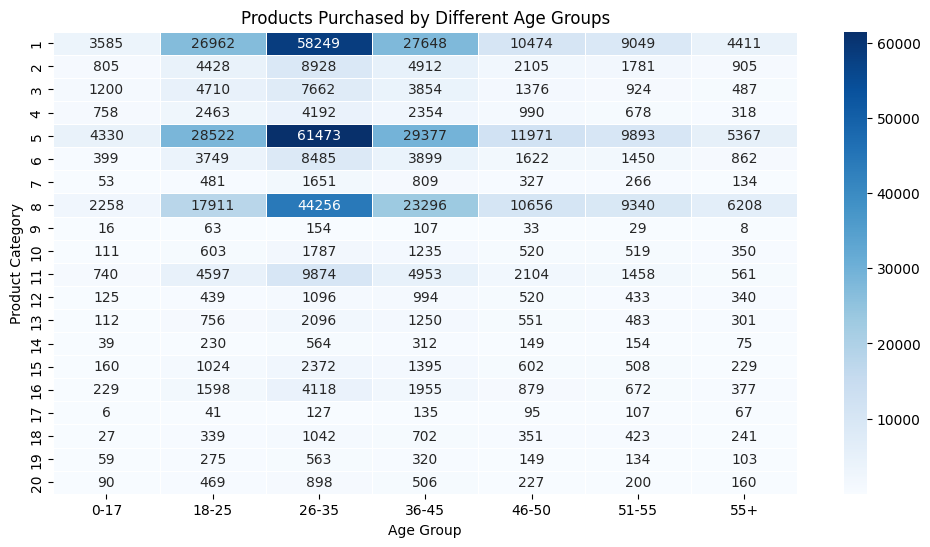

In [33]:
pivot_table = df.pivot_table(index='Product_Category', columns='Age', aggfunc='size')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d',edgecolors='black',linewidths=0.5)
plt.xlabel('Age Group')
plt.ylabel('Product Category')
plt.title('Products Purchased by Different Age Groups')
plt.show()

**Insights/Conclusion:**

* Category 5: Most popular across all ages. Peaks among 26-35, 36-45; significant 18-25 purchases.
* Category 1: Peak among 26-35; consistent across ages.
* Category 8: Peaks in 26-35; consistent across ages.

### Is there a relationship between age, marital status, and the amount spent?

In [34]:
# Calculate mean purchase amount for each marital status and age group
df.groupby(['Marital_Status', 'Age'])['Purchase'].mean()

Marital_Status  Age  
0               0-17     8925.539597
                18-25    9211.257072
                26-35    9244.765728
                36-45    9392.473063
                46-50    8944.552246
                51-55    9558.764692
                55+      9523.315299
1               18-25    8989.115150
                26-35    9245.227167
                36-45    9211.997605
                46-50    9296.164960
                51-55    9504.198738
                55+      9201.968468
Name: Purchase, dtype: float64

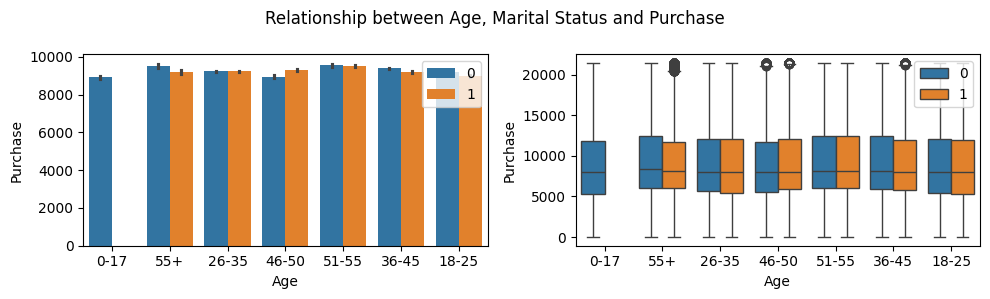

In [35]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.legend(loc='upper right')

plt.suptitle('Relationship between Age, Marital Status and Purchase')
plt.tight_layout()
plt.show()

**Insights/Conclusion:**

* Marital status minimally affects purchase amounts; consistent spending across age groups, slightly higher in 51-55 age bracket.
* Customers in Age group 0-17 are all unmarried, representing childrens.

# Correlation among different factors

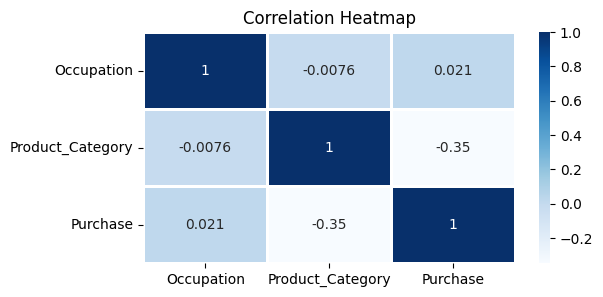

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',edgecolors='black',linewidths=1)
plt.title('Correlation Heatmap')

plt.show()

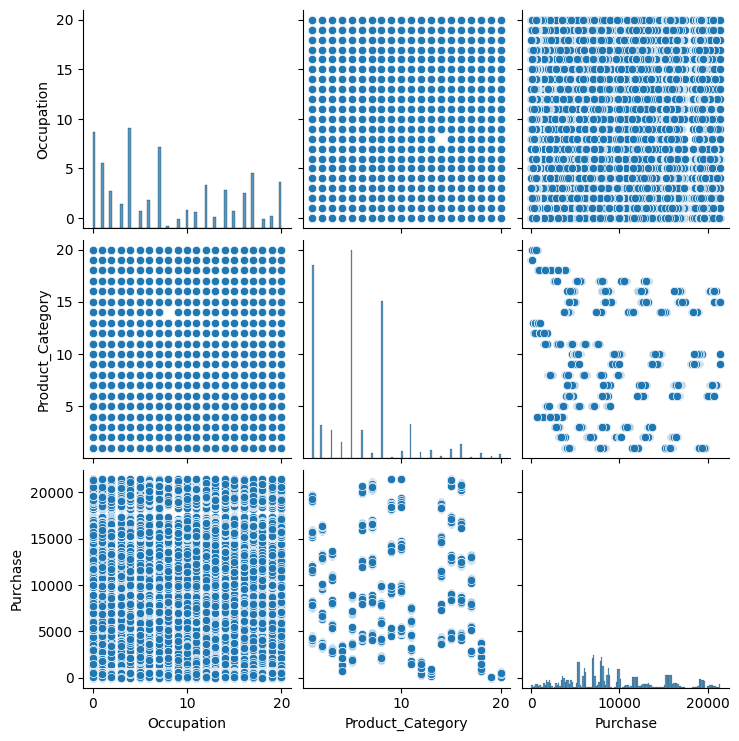

In [37]:
sns.pairplot(df[['Occupation','Product_Category','Purchase']])
plt.show()

**Insights/Conclusion:**
The correlation plot reveals no significant correlations between any variable pairs.

# How does gender affect the amount spent?

In [38]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8726.256327
M    9428.373455
Name: Purchase, dtype: float64

In [39]:
df.groupby('Gender')['Purchase'].sum()

Gender
F    1.185104e+09
M    3.905789e+09
Name: Purchase, dtype: float64

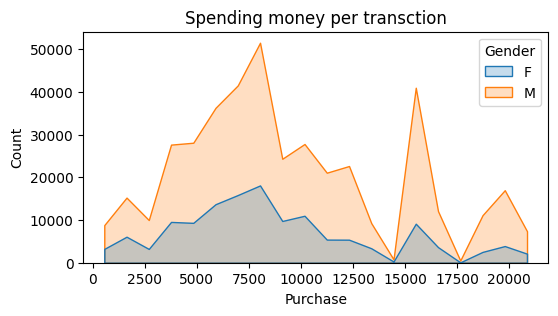

In [40]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender", element="poly")
plt.title("Spending money per transction")
plt.show()

**Insights/Conclusion:**

* Males average spending is significantly higher than that of females.
* Males collectively spent \$4 billion, while females spent \$1.2 billion.

* There can be multiple reasons for this :
 * Socio-economic status.
 * Generally male starts earning way before females.
 * Generally male customers earns more than females.

<Figure size 400x400 with 0 Axes>

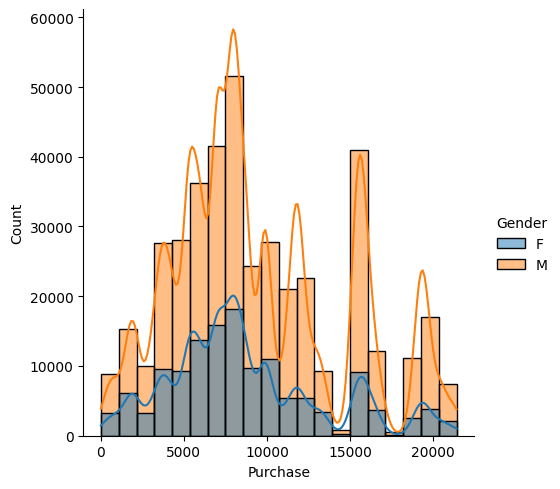

In [41]:
plt.figure(figsize=(4, 4))
sns.displot(x = 'Purchase', data = df, hue='Gender', bins=20, kde = True)
plt.show()

In [42]:
df_male = df[df['Gender']=='M']['Purchase']
df_female = df[df['Gender']=='F']['Purchase']
print("Male customers are: ", df_male.shape[0])
print("Female customers are: ", df_female.shape[0])

Male customers are:  414259
Female customers are:  135809


## Calculating CI (90%, 95%, 99%) using Bootstrapping for Puchases based on Gender using CLT.

In [43]:
def bootstrapping_gender_purchase(sample1, sample2, sample_size=500, iterations=5000, confidence_level=0.95, no_of_tails=2):
    sample1_means = np.empty(iterations)
    sample2_means = np.empty(iterations)

    for i in range(iterations):
        sample1_n = np.random.choice(sample1, size=sample_size, replace=True)
        sample2_n = np.random.choice(sample2, size=sample_size, replace=True)
        sample1_means[i] = np.mean(sample1_n)
        sample2_means[i] = np.mean(sample2_n)

    # Calculate the Z-Critical value
    alpha = (1 - confidence_level) / no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean for sample1
    mean1 = np.mean(sample1_means)
    sigma1 = np.std(sample1_means)
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean for sample2
    mean2 = np.mean(sample2_means)
    sigma2 = np.std(sample2_means)
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.set_style("white")

    sns.kdeplot(data=sample1_means, fill=True, linewidth=2, color='skyblue')
    sns.kdeplot(data=sample2_means, fill=True, linewidth=2, color='salmon')

    label_mean1 = ("μ (Males): {:.2f}".format(mean1))
    label_ult1 = ("Lower Limit(M): {:.2f}\nUpper Limit(M): {:.2f}".format(lower_limit1, upper_limit1))
    label_mean2 = ("μ (Females): {:.2f}".format(mean2))
    label_ult2 = ("Lower Limit(F): {:.2f}\nUpper Limit(F): {:.2f}".format(lower_limit2, upper_limit2))

    plt.title(f"{confidence_level * 100}% CI on sample size = {sample_size}")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color='gold', linestyle='solid', linewidth=2, label=label_mean1)
    plt.axvline(upper_limit1, color='red', linestyle='solid', linewidth=2, label=label_ult1)
    plt.axvline(lower_limit1, color='red', linestyle='solid', linewidth=2)
    plt.axvline(mean2, color='blue', linestyle='dashdot', linewidth=2, label=label_mean2)
    plt.axvline(upper_limit2, color='green', linestyle='dashdot', linewidth=2, label=label_ult2)
    plt.axvline(lower_limit2, color='green', linestyle='dashdot', linewidth=2)
    plt.legend(loc='best')

    plt.show()

    return sample1_means, sample2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)


### Calculate 90% CI

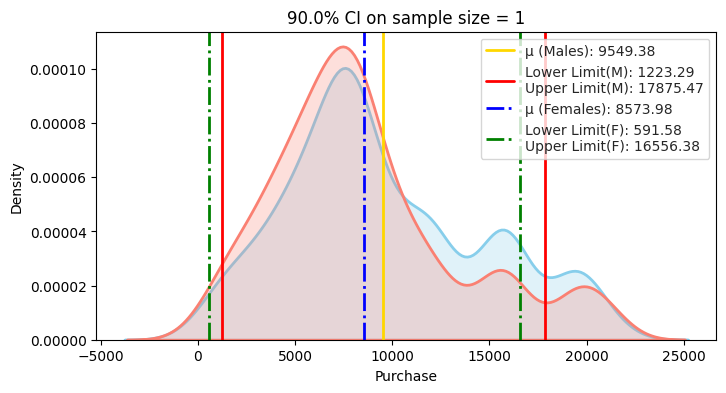

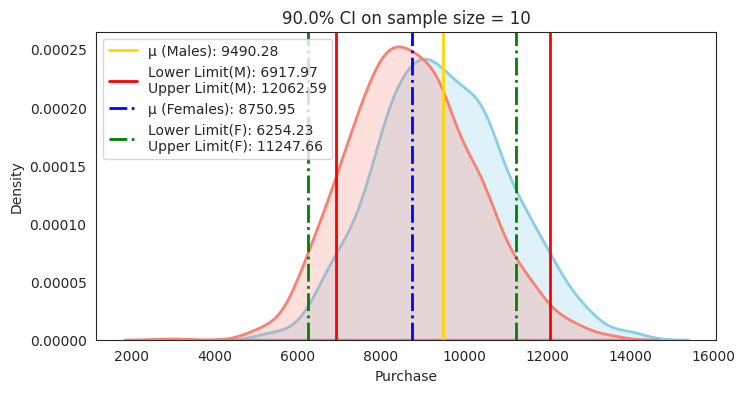

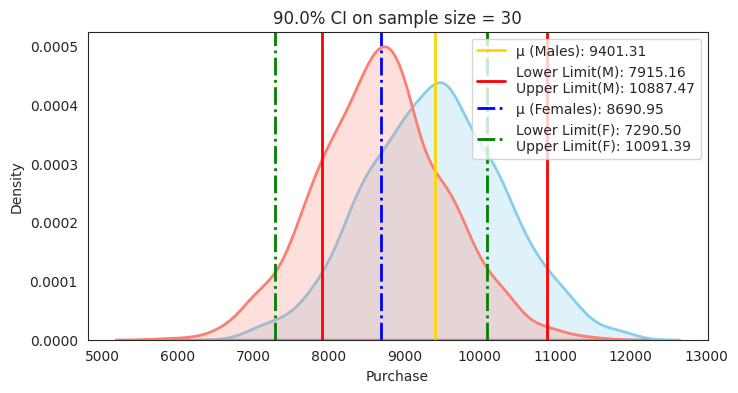

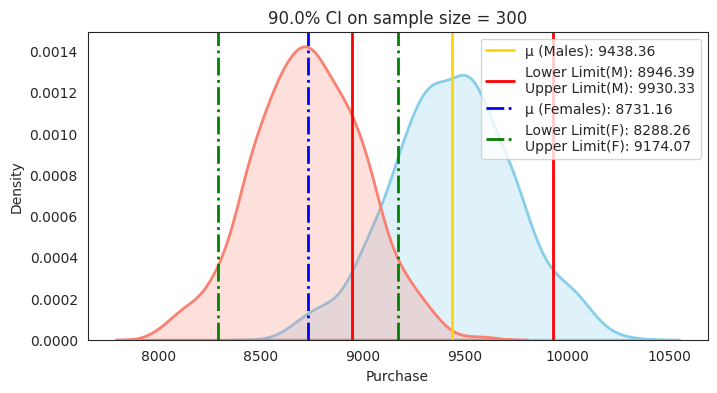

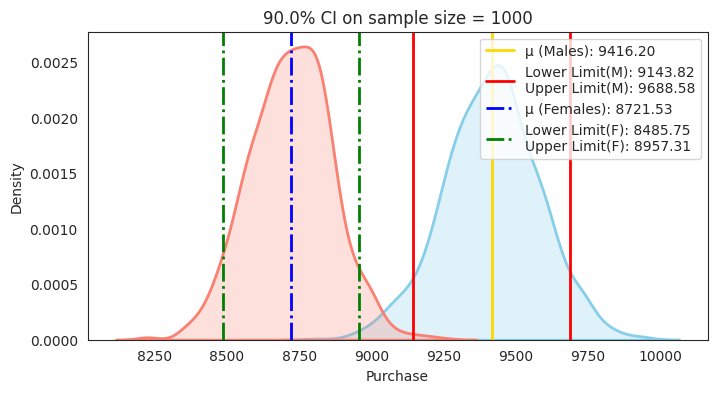

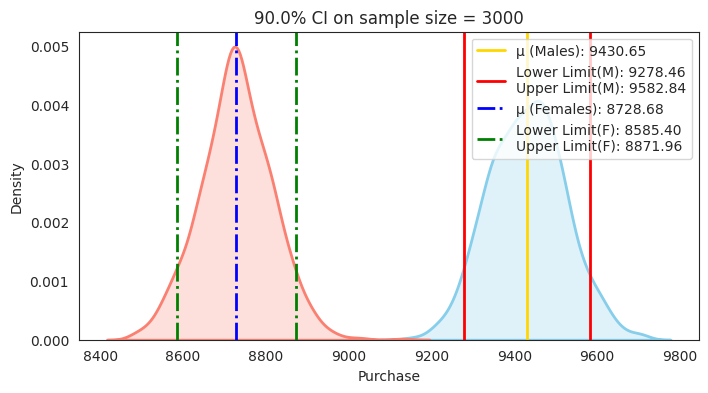

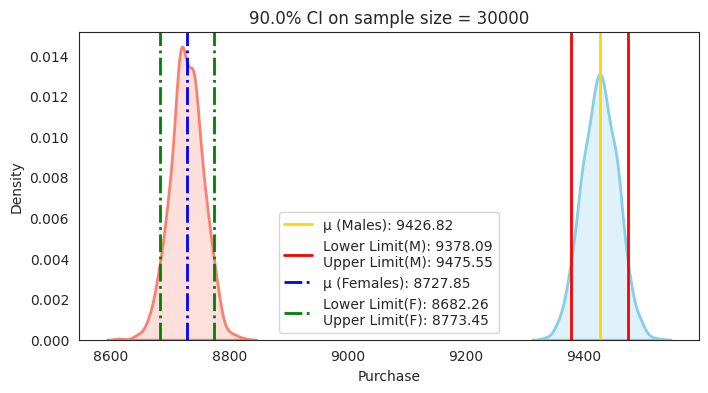

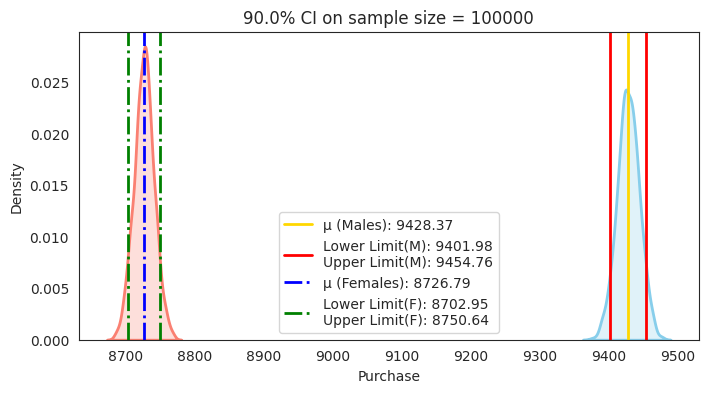

   Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
0       M      1223.29     17875.47            1  [1223.29, 17875.47]   
1       F       591.58     16556.38            1   [591.58, 16556.38]   
2       M      6917.97     12062.59           10  [6917.97, 12062.59]   
3       F      6254.23     11247.66           10  [6254.23, 11247.66]   
4       M      7915.16     10887.47           30  [7915.16, 10887.47]   
5       F      7290.50     10091.39           30   [7290.5, 10091.39]   
6       M      8946.39      9930.33          300   [8946.39, 9930.33]   
7       F      8288.26      9174.07          300   [8288.26, 9174.07]   
8       M      9143.82      9688.58         1000   [9143.82, 9688.58]   
9       F      8485.75      8957.31         1000   [8485.75, 8957.31]   
10      M      9278.46      9582.84         3000   [9278.46, 9582.84]   
11      F      8585.40      8871.96         3000    [8585.4, 8871.96]   
12      M      9378.09      9475.55        30000   

In [44]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.90

array = []

for sample_size in size_list:
    m_avg, f_avg, lower_limit_m, upper_limit_m, lower_limit_f, upper_limit_f = bootstrapping_gender_purchase(df_male, df_female, sample_size, iterations, ci)

    # Append male data to array
    array.append(['M', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['F', lower_limit_f, upper_limit_f, sample_size, [lower_limit_f, upper_limit_f], upper_limit_f - lower_limit_f, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Gender', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [45]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
8       M      9143.82      9688.58         1000  [9143.82, 9688.58]  544.76   
10      M      9278.46      9582.84         3000  [9278.46, 9582.84]  304.38   
12      M      9378.09      9475.55        30000  [9378.09, 9475.55]   97.46   
14      M      9401.98      9454.76       100000  [9401.98, 9454.76]   52.78   

    Confidence_pct  
8              0.9  
10             0.9  
12             0.9  
14             0.9

In [46]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
9       F      8485.75      8957.31         1000  [8485.75, 8957.31]  471.56   
11      F      8585.40      8871.96         3000   [8585.4, 8871.96]  286.56   
13      F      8682.26      8773.45        30000  [8682.26, 8773.45]   91.19   
15      F      8702.95      8750.64       100000  [8702.95, 8750.64]   47.69   

    Confidence_pct  
9              0.9  
11             0.9  
13             0.9  
15             0.9

**Insights/Conclusion:**

* With larger sample sizes, the distinction between the two groups becomes clearer.

* As the sample size increases, the standard error of the mean decreases, enhancing the precision of the estimates.

* For females (sample size 100000), the mean purchase range with a 90\% confidence interval is [8702.18, 8750.42].

* For males (sample size 100000), the range with a 90\% confidence interval is [9401.96, 9454.21].

* No overlapping intervals were observed between the genders.

### Calculate 95% CI

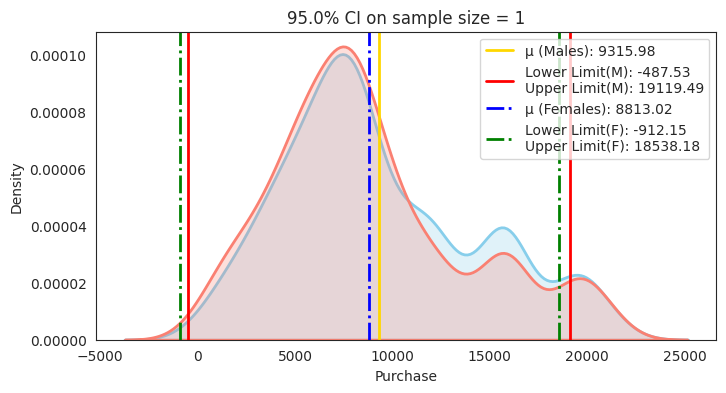

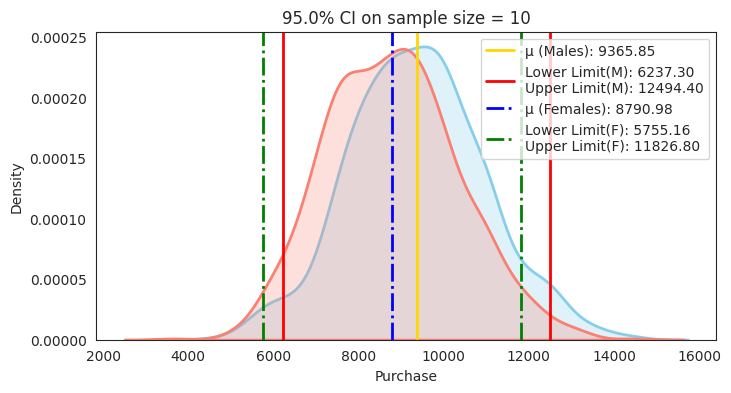

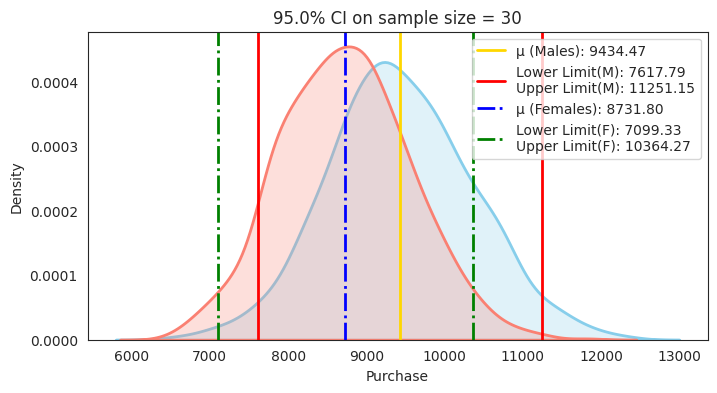

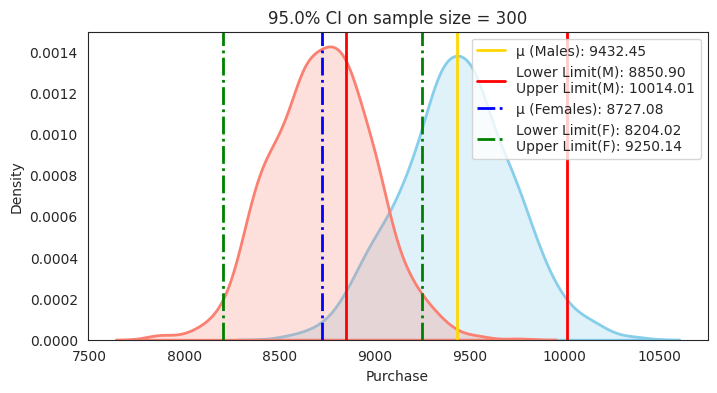

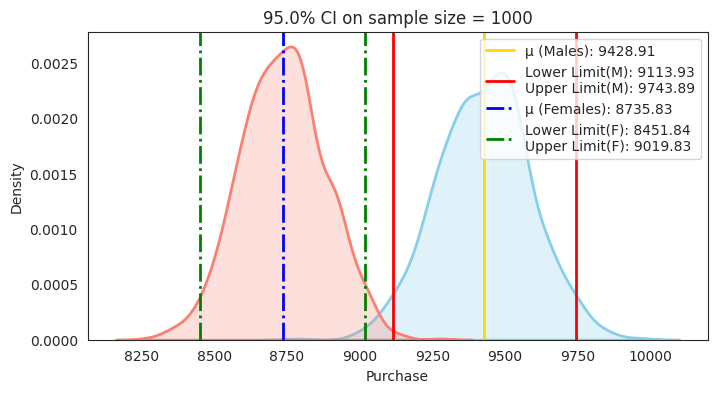

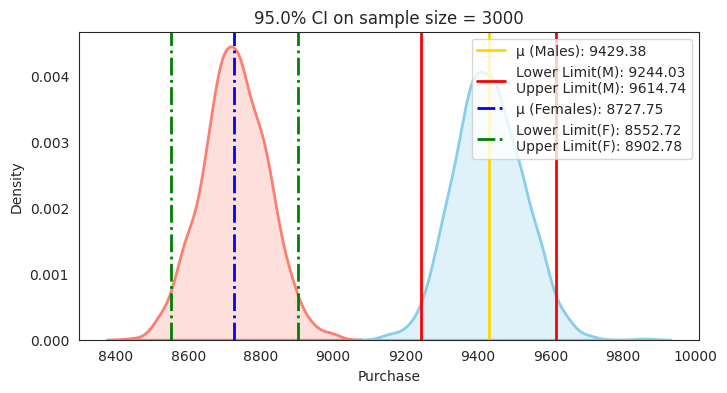

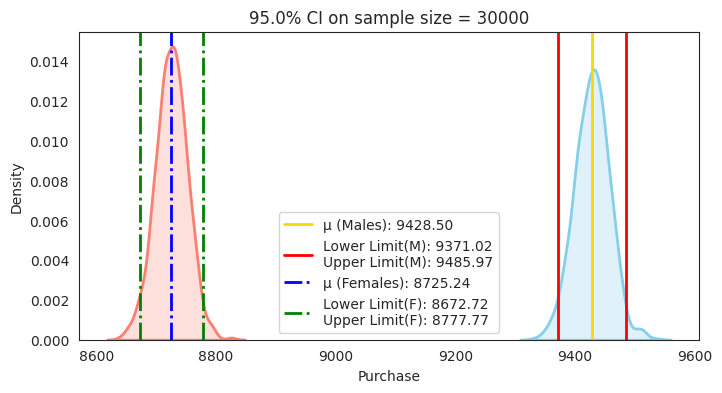

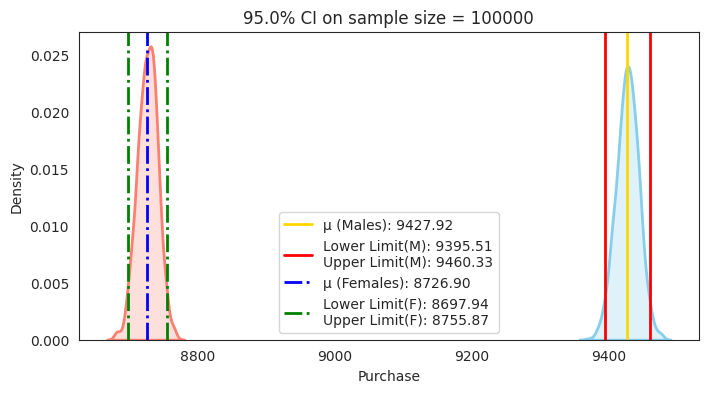

   Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
0       M      -487.53     19119.49            1  [-487.53, 19119.49]   
1       F      -912.15     18538.18            1  [-912.15, 18538.18]   
2       M      6237.30     12494.40           10    [6237.3, 12494.4]   
3       F      5755.16     11826.80           10   [5755.16, 11826.8]   
4       M      7617.79     11251.15           30  [7617.79, 11251.15]   
5       F      7099.33     10364.27           30  [7099.33, 10364.27]   
6       M      8850.90     10014.01          300   [8850.9, 10014.01]   
7       F      8204.02      9250.14          300   [8204.02, 9250.14]   
8       M      9113.93      9743.89         1000   [9113.93, 9743.89]   
9       F      8451.84      9019.83         1000   [8451.84, 9019.83]   
10      M      9244.03      9614.74         3000   [9244.03, 9614.74]   
11      F      8552.72      8902.78         3000   [8552.72, 8902.78]   
12      M      9371.02      9485.97        30000   

In [47]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.95

array = []

for sample_size in size_list:
    m_avg, f_avg, lower_limit_m, upper_limit_m, lower_limit_f, upper_limit_f = bootstrapping_gender_purchase(df_male, df_female, sample_size, iterations, ci)

    # Append male data to array
    array.append(['M', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['F', lower_limit_f, upper_limit_f, sample_size, [lower_limit_f, upper_limit_f], upper_limit_f - lower_limit_f, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Gender', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [48]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
8       M      9113.93      9743.89         1000  [9113.93, 9743.89]  629.96   
10      M      9244.03      9614.74         3000  [9244.03, 9614.74]  370.71   
12      M      9371.02      9485.97        30000  [9371.02, 9485.97]  114.95   
14      M      9395.51      9460.33       100000  [9395.51, 9460.33]   64.82   

    Confidence_pct  
8             0.95  
10            0.95  
12            0.95  
14            0.95

In [49]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
9       F      8451.84      9019.83         1000  [8451.84, 9019.83]  567.99   
11      F      8552.72      8902.78         3000  [8552.72, 8902.78]  350.06   
13      F      8672.72      8777.77        30000  [8672.72, 8777.77]  105.05   
15      F      8697.94      8755.87       100000  [8697.94, 8755.87]   57.93   

    Confidence_pct  
9             0.95  
11            0.95  
13            0.95  
15            0.95

**Insights/Conclusion:**

* With a 95\% confidence interval, gender-based mean purchase values exhibit a similar trend as with 90\% confidence.

* As sample sizes grow, gender groups become more distinguishable.

* With larger samples, the standard error of the mean decreases. For sample size 100000, it is 0.47.

* For females (sample size 100000), the mean purchase range with a 95% confidence interval is [8696.27, 8756.56].

* For males, the range with a 95\% confidence interval is [9396.46, 9460.99].

### Calculate 99% CI

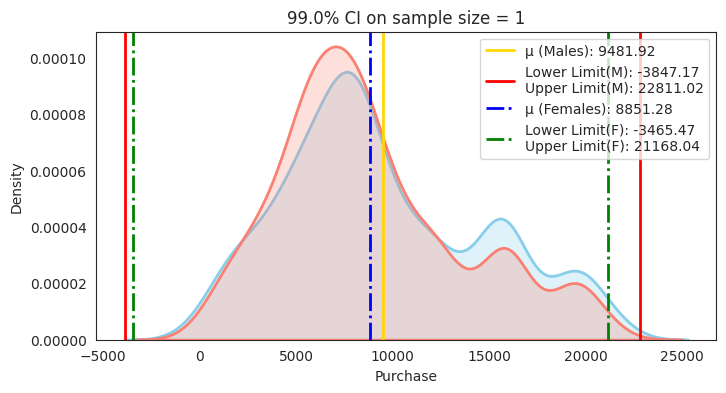

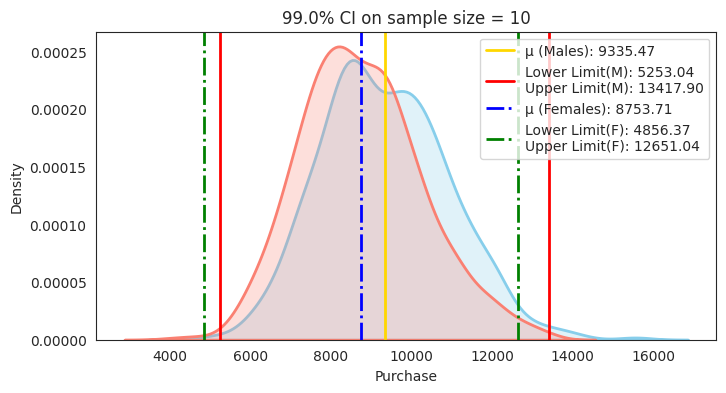

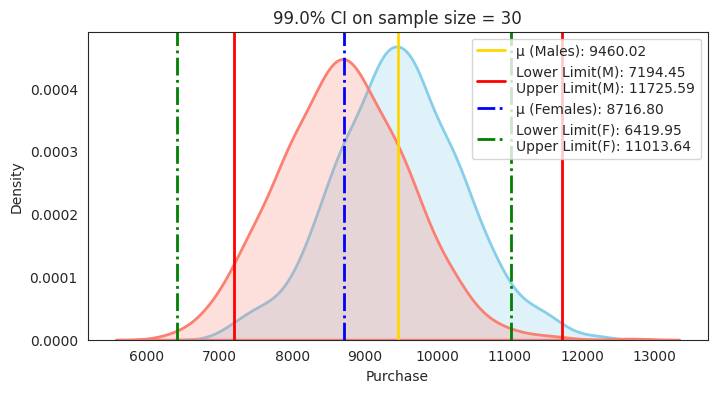

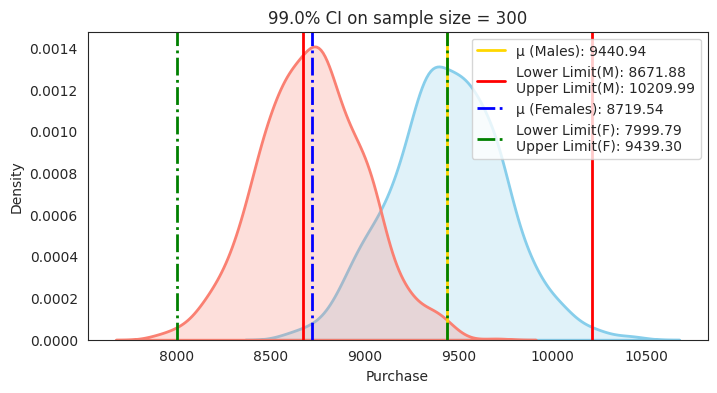

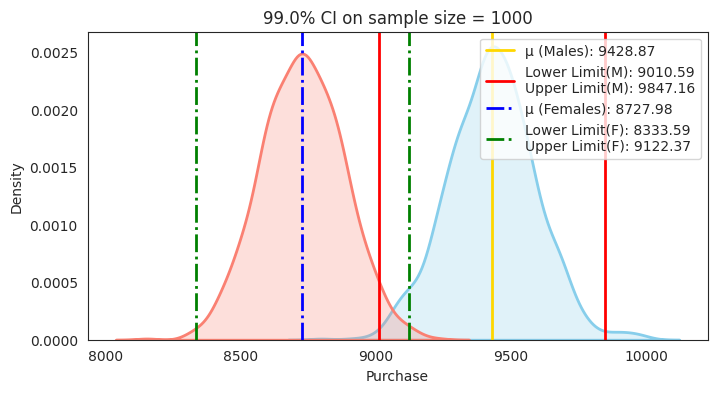

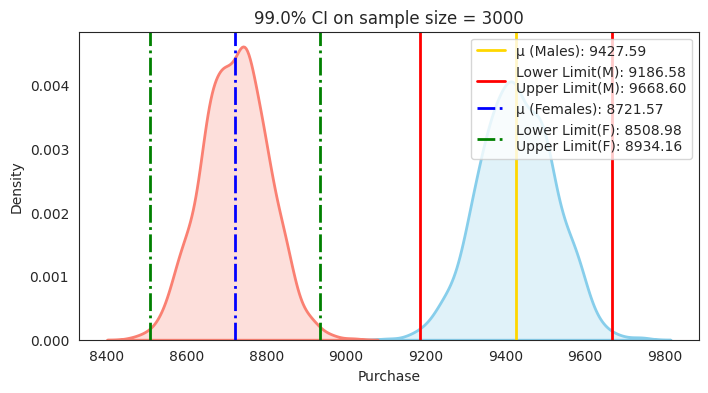

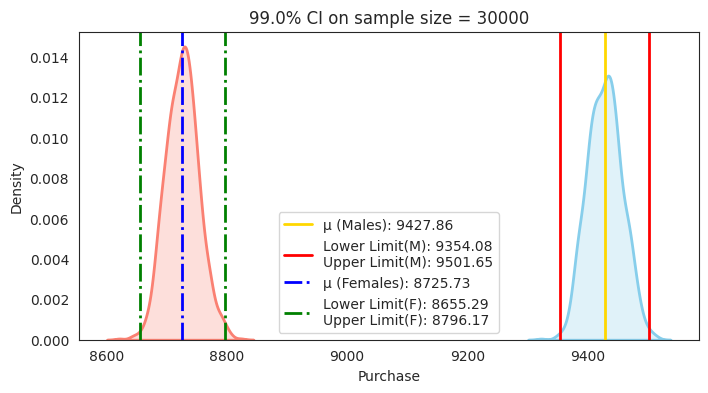

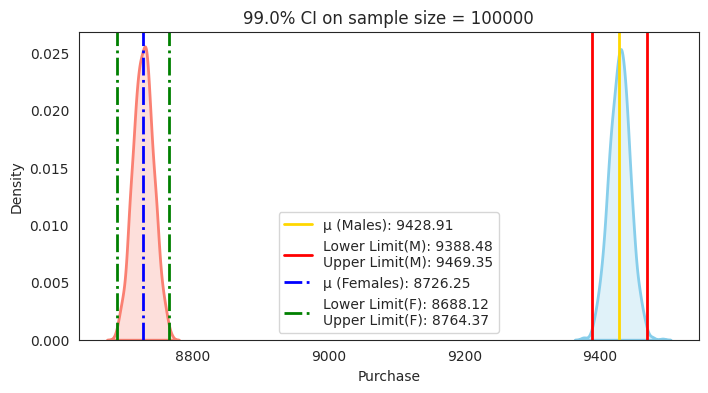

   Gender  Lower_limit  Upper_limit  Sample_Size                    CI  \
0       M     -3847.17     22811.02            1  [-3847.17, 22811.02]   
1       F     -3465.47     21168.04            1  [-3465.47, 21168.04]   
2       M      5253.04     13417.90           10    [5253.04, 13417.9]   
3       F      4856.37     12651.04           10   [4856.37, 12651.04]   
4       M      7194.45     11725.59           30   [7194.45, 11725.59]   
5       F      6419.95     11013.64           30   [6419.95, 11013.64]   
6       M      8671.88     10209.99          300   [8671.88, 10209.99]   
7       F      7999.79      9439.30          300     [7999.79, 9439.3]   
8       M      9010.59      9847.16         1000    [9010.59, 9847.16]   
9       F      8333.59      9122.37         1000    [8333.59, 9122.37]   
10      M      9186.58      9668.60         3000     [9186.58, 9668.6]   
11      F      8508.98      8934.16         3000    [8508.98, 8934.16]   
12      M      9354.08      9501.65   

In [50]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.99

array = []

for sample_size in size_list:
    m_avg, f_avg, lower_limit_m, upper_limit_m, lower_limit_f, upper_limit_f = bootstrapping_gender_purchase(df_male, df_female, sample_size, iterations, ci)

    # Append male data to array
    array.append(['M', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['F', lower_limit_f, upper_limit_f, sample_size, [lower_limit_f, upper_limit_f], upper_limit_f - lower_limit_f, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Gender', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [51]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
8       M      9010.59      9847.16         1000  [9010.59, 9847.16]  836.57   
10      M      9186.58      9668.60         3000   [9186.58, 9668.6]  482.02   
12      M      9354.08      9501.65        30000  [9354.08, 9501.65]  147.57   
14      M      9388.48      9469.35       100000  [9388.48, 9469.35]   80.87   

    Confidence_pct  
8             0.99  
10            0.99  
12            0.99  
14            0.99

In [52]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI   Range  \
9       F      8333.59      9122.37         1000  [8333.59, 9122.37]  788.78   
11      F      8508.98      8934.16         3000  [8508.98, 8934.16]  425.18   
13      F      8655.29      8796.17        30000  [8655.29, 8796.17]  140.88   
15      F      8688.12      8764.37       100000  [8688.12, 8764.37]   76.25   

    Confidence_pct  
9             0.99  
11            0.99  
13            0.99  
15            0.99

**Insights/Conclusion:**

* When using a 99\% confidence interval, the mean purchase values by gender exhibit a similar trend as observed with 90\% and 95\% confidence intervals.

* As the sample size grows, the distinction between male and female groups becomes more pronounced.

* With larger sample sizes, the standard error of the mean decreases, enhancing the accuracy of the estimates. For a sample size of 100000, the standard error of the mean is 0.45.

* For females (sample size 100000), the mean purchase range with a 99\% confidence interval is [8688.06, 8765.27].

* For males (sample size 100000), the range with a 99\% confidence interval is [9386.87, 9470.86].

#### Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

Yes, the confidence interval computed using the entire dataset is wider for males compared to females. This could be due to greater variability in spending behavior among males, resulting in a broader range of potential average spending values.

#### How is the width of the confidence interval affected by the sample size?

The width of the confidence interval is inversely affected by the sample size. As the sample size increases, the width of the confidence interval decreases. This is because larger sample sizes provide more precise estimates of the population parameter, leading to narrower confidence intervals.

#### Do the confidence intervals for different sample sizes overlap?

No, the confidence intervals for different sample sizes do not overlap. As the sample size increases, the precision of the estimate improves, resulting in narrower confidence intervals. Therefore, the confidence intervals for larger sample sizes are distinct from those of smaller sample sizes.

#### How does the sample size affect the shape of the distributions of the means?

With increasing sample size, the shape of the distribution of the means becomes more symmetric and approaches a normal distribution. Additionally, the distribution becomes narrower, indicating reduced variability in the sample means and increased precision in estimating the population parameter.

### **Conclusion:**

The data indicates that gender has a significant effect on the amount spent, with males generally spending more than females. This is evident from the consistently wider confidence intervals and smaller sample sizes associated with females compared to males across different confidence levels. Adding some additional offers for women can increase their spending on Black Friday.

# How does Marital_Status affect the amount spent?

In [53]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9257.517959
1    9251.430702
Name: Purchase, dtype: float64

In [54]:
df.groupby('Marital_Status')['Purchase'].sum()

Marital_Status
0    3.006203e+09
1    2.084690e+09
Name: Purchase, dtype: float64

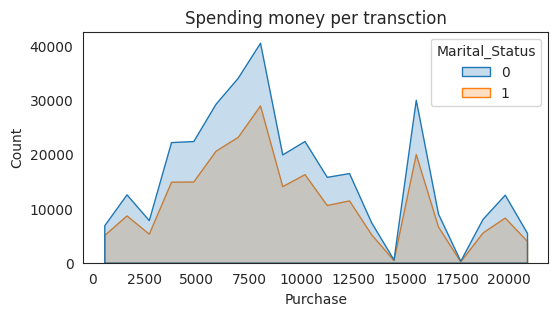

In [55]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Marital_Status", element="poly")
plt.title("Spending money per transction")
plt.show()

**Insights/Conclusion:**

* Average purchase amount is comparable between marital statuses, slightly favoring unmarried individuals.
* Unmarried individuals contributed approximately \$3 billion, while married individuals spent around \$2 billion in total.


<Figure size 400x400 with 0 Axes>

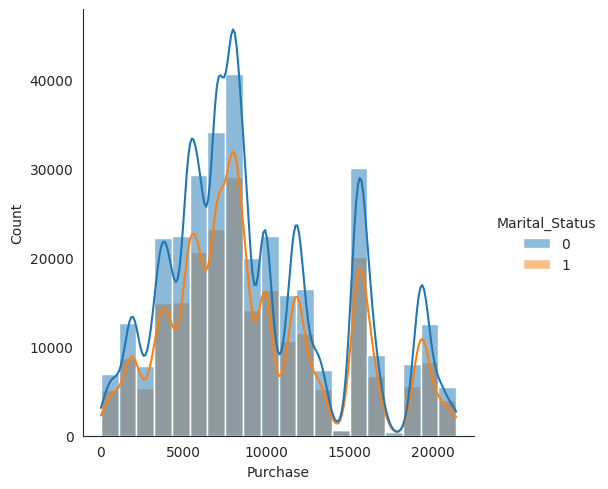

In [56]:
plt.figure(figsize=(4, 4))
sns.displot(x = 'Purchase', data = df, hue='Marital_Status', bins=20, kde = True)
plt.show()

In [57]:
df_married = df[df['Marital_Status']==1]['Purchase']
df_unmarried = df[df['Marital_Status']==0]['Purchase']
print("Married customers are: ", df_married.shape[0])
print("Unmarried customers are: ", df_unmarried.shape[0])

Married customers are:  225337
Unmarried customers are:  324731


## Calculating CI (90%, 95%, 99%) using Bootstrapping for Puchases based on Marital_Status using CLT.

In [58]:
def bootstrapping_marital_status_purchase(sample1, sample2, sample_size=500, iterations=5000, confidence_level=0.95, no_of_tails=2):
    sample1_means = np.empty(iterations)
    sample2_means = np.empty(iterations)

    for i in range(iterations):
        sample1_n = np.random.choice(sample1, size=sample_size, replace=True)
        sample2_n = np.random.choice(sample2, size=sample_size, replace=True)
        sample1_means[i] = np.mean(sample1_n)
        sample2_means[i] = np.mean(sample2_n)

    # Calculate the Z-Critical value
    alpha = (1 - confidence_level) / no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean for sample1
    mean1 = np.mean(sample1_means)
    sigma1 = np.std(sample1_means)
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean for sample2
    mean2 = np.mean(sample2_means)
    sigma2 = np.std(sample2_means)
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.set_style("white")

    sns.kdeplot(data=sample1_means, fill=True, linewidth=2, color='skyblue')
    sns.kdeplot(data=sample2_means, fill=True, linewidth=2, color='salmon')

    label_mean1 = ("μ (Married): {:.2f}".format(mean1))
    label_ult1 = ("Lower Limit(M): {:.2f}\nUpper Limit(M): {:.2f}".format(lower_limit1, upper_limit1))
    label_mean2 = ("μ (Unmarried): {:.2f}".format(mean2))
    label_ult2 = ("Lower Limit(F): {:.2f}\nUpper Limit(F): {:.2f}".format(lower_limit2, upper_limit2))

    plt.title(f"{confidence_level * 100}% CI on sample size = {sample_size}")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color='gold', linestyle='solid', linewidth=2, label=label_mean1)
    plt.axvline(upper_limit1, color='red', linestyle='solid', linewidth=2, label=label_ult1)
    plt.axvline(lower_limit1, color='red', linestyle='solid', linewidth=2)
    plt.axvline(mean2, color='blue', linestyle='dashdot', linewidth=2, label=label_mean2)
    plt.axvline(upper_limit2, color='green', linestyle='dashdot', linewidth=2, label=label_ult2)
    plt.axvline(lower_limit2, color='green', linestyle='dashdot', linewidth=2)
    plt.legend(loc='best')

    plt.show()

    return sample1_means, sample2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)


### Calculate 90% CI

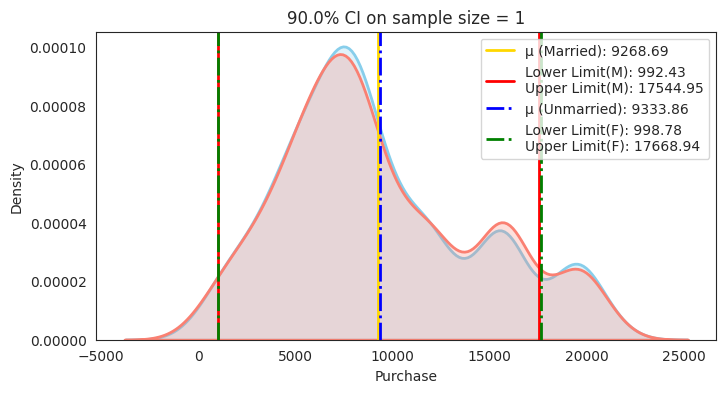

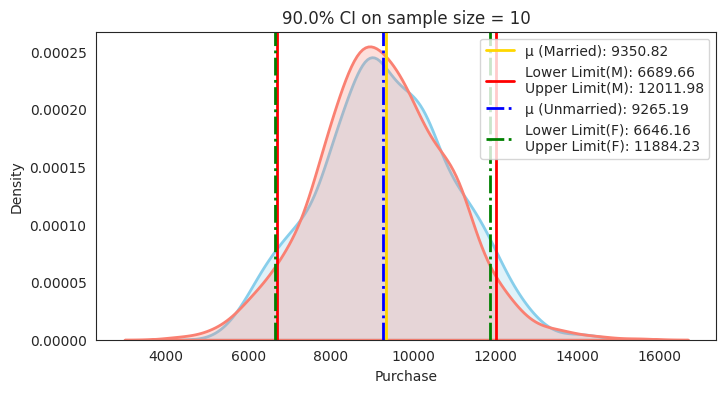

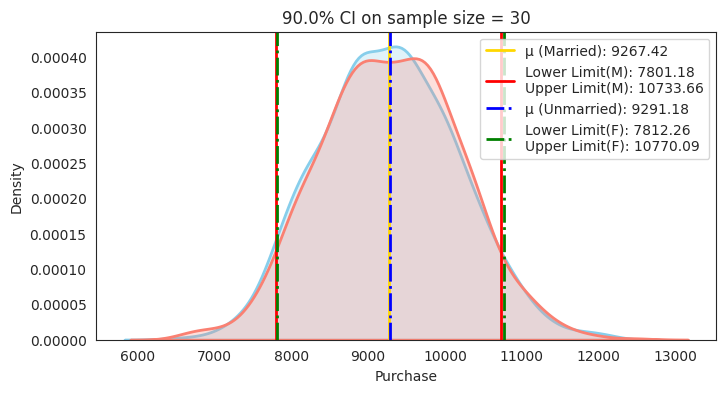

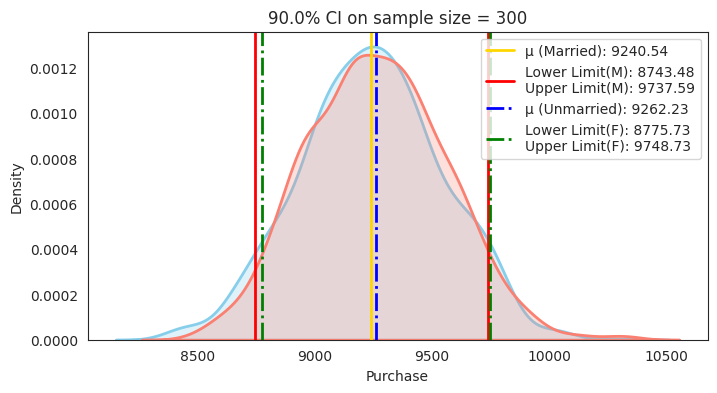

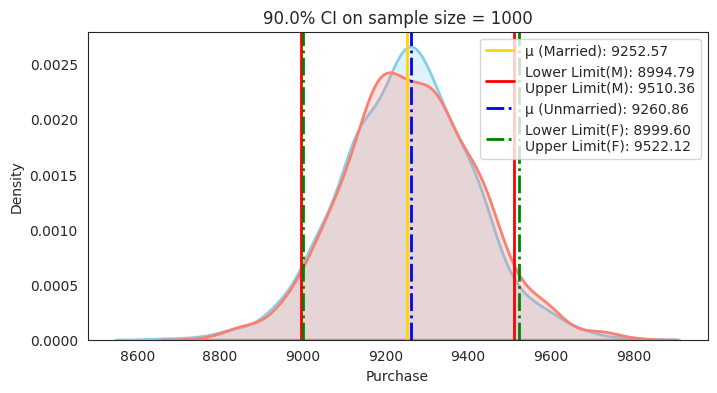

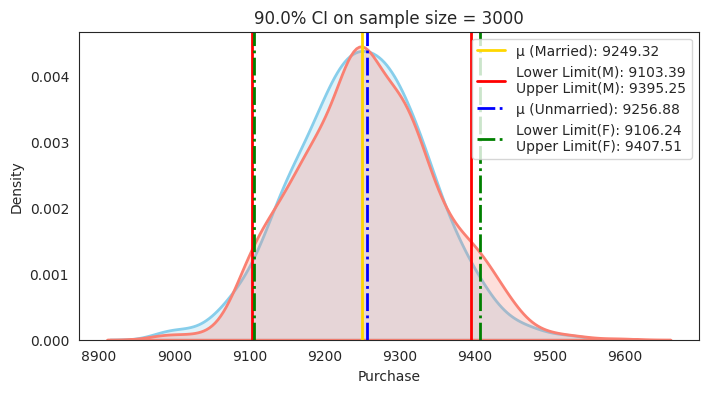

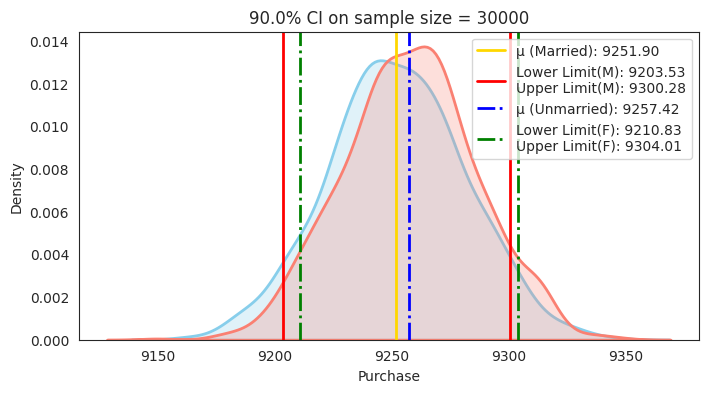

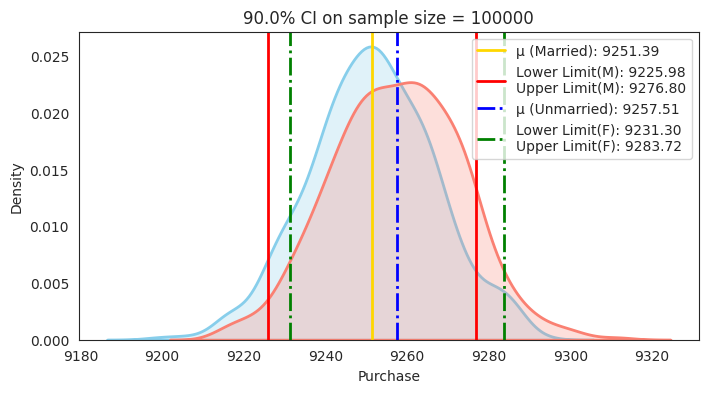

   Marital_Status  Lower_limit  Upper_limit  Sample_Size                   CI  \
0         Married       992.43     17544.95            1   [992.43, 17544.95]   
1       Unmarried       998.78     17668.94            1   [998.78, 17668.94]   
2         Married      6689.66     12011.98           10  [6689.66, 12011.98]   
3       Unmarried      6646.16     11884.23           10  [6646.16, 11884.23]   
4         Married      7801.18     10733.66           30  [7801.18, 10733.66]   
5       Unmarried      7812.26     10770.09           30  [7812.26, 10770.09]   
6         Married      8743.48      9737.59          300   [8743.48, 9737.59]   
7       Unmarried      8775.73      9748.73          300   [8775.73, 9748.73]   
8         Married      8994.79      9510.36         1000   [8994.79, 9510.36]   
9       Unmarried      8999.60      9522.12         1000    [8999.6, 9522.12]   
10        Married      9103.39      9395.25         3000   [9103.39, 9395.25]   
11      Unmarried      9106.

In [59]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.90

array = []

for sample_size in size_list:
    m_avg, u_avg, lower_limit_m, upper_limit_m, lower_limit_u, upper_limit_u = bootstrapping_marital_status_purchase(df_married, df_unmarried, sample_size, iterations, ci)

    # Append male data to array
    array.append(['Married', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['Unmarried', lower_limit_u, upper_limit_u, sample_size, [lower_limit_u, upper_limit_u], upper_limit_u - lower_limit_u, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Marital_Status', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [60]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
6         Married      8743.48      9737.59          300  [8743.48, 9737.59]   
8         Married      8994.79      9510.36         1000  [8994.79, 9510.36]   
10        Married      9103.39      9395.25         3000  [9103.39, 9395.25]   
12        Married      9203.53      9300.28        30000  [9203.53, 9300.28]   
14        Married      9225.98      9276.80       100000   [9225.98, 9276.8]   

     Range  Confidence_pct  
6   994.11             0.9  
8   515.57             0.9  
10  291.86             0.9  
12   96.75             0.9  
14   50.82             0.9

In [61]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
7       Unmarried      8775.73      9748.73          300  [8775.73, 9748.73]   
9       Unmarried      8999.60      9522.12         1000   [8999.6, 9522.12]   
11      Unmarried      9106.24      9407.51         3000  [9106.24, 9407.51]   
13      Unmarried      9210.83      9304.01        30000  [9210.83, 9304.01]   
15      Unmarried      9231.30      9283.72       100000   [9231.3, 9283.72]   

     Range  Confidence_pct  
7   973.00             0.9  
9   522.52             0.9  
11  301.27             0.9  
13   93.18             0.9  
15   52.42             0.9

**Insights/Conclusion:**

* For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 90% is [9232.34, 9283.99].

* For married customer (sample size 100000) range for mean purchase with confidence interval 90% is [9226.46, 9277.38].

### Calculate 95% CI

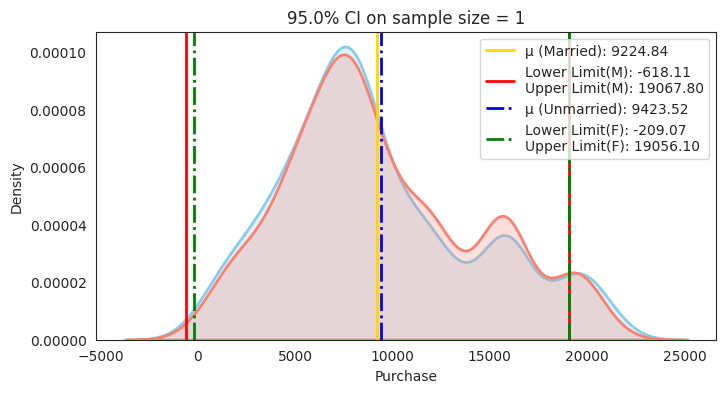

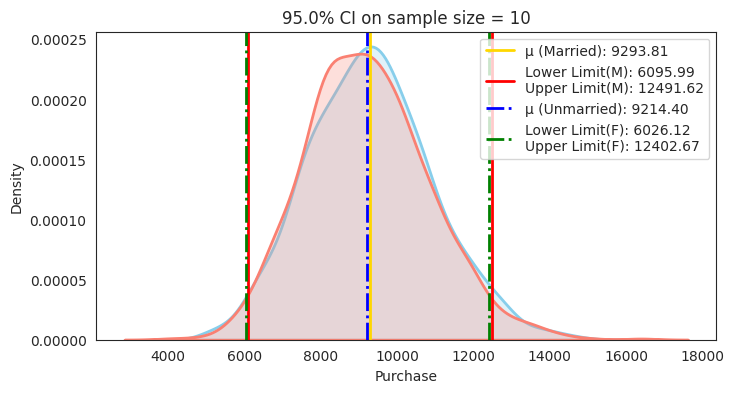

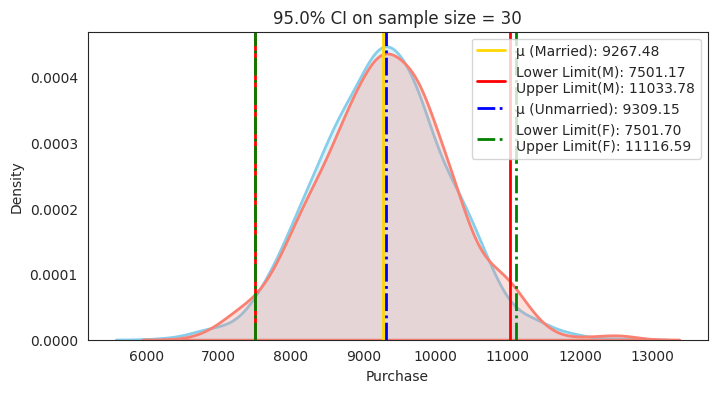

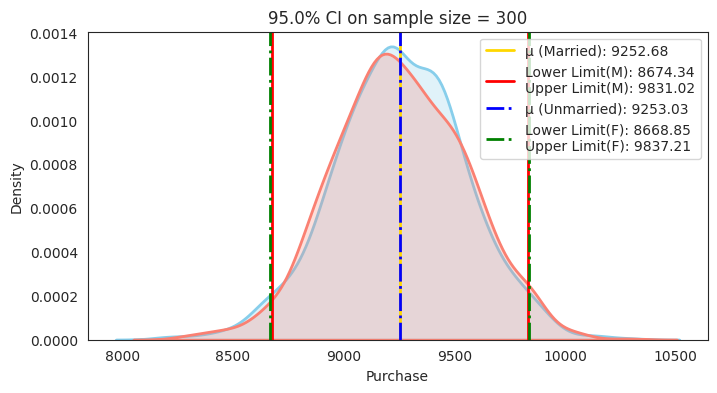

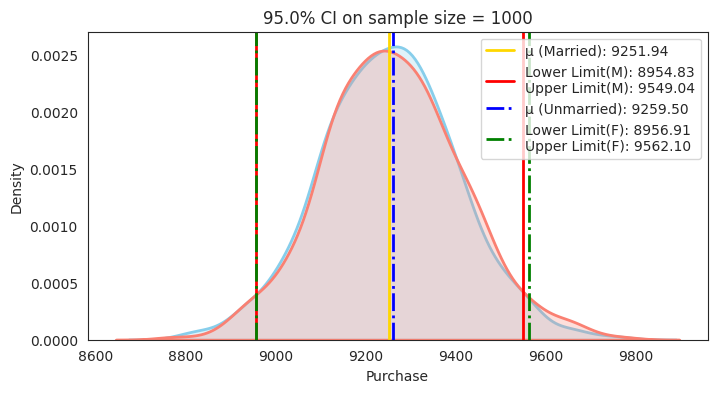

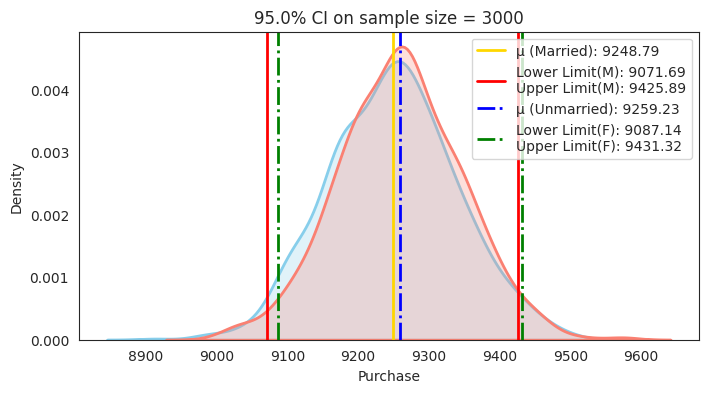

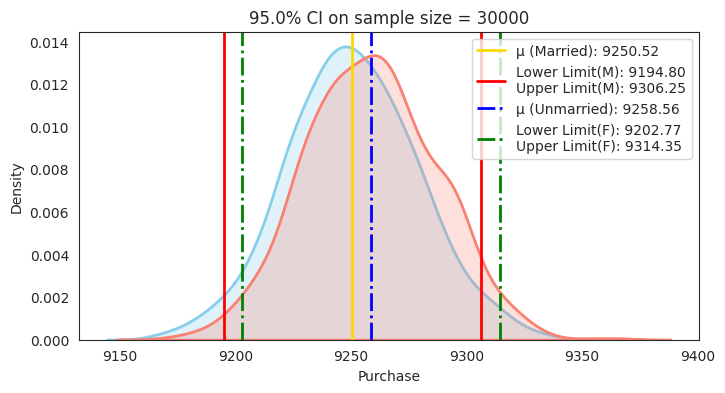

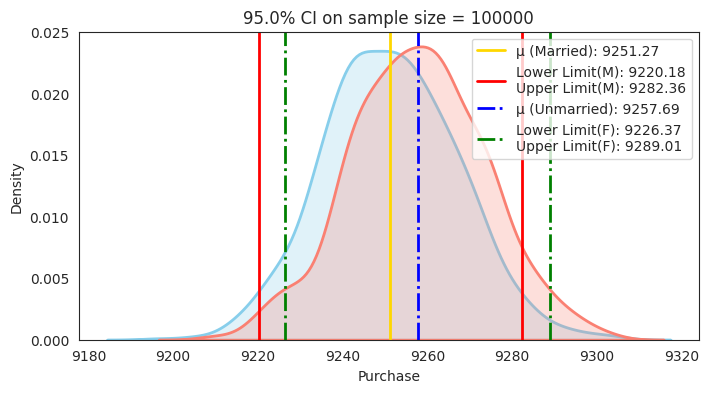

   Marital_Status  Lower_limit  Upper_limit  Sample_Size                   CI  \
0         Married      -618.11     19067.80            1   [-618.11, 19067.8]   
1       Unmarried      -209.07     19056.10            1   [-209.07, 19056.1]   
2         Married      6095.99     12491.62           10  [6095.99, 12491.62]   
3       Unmarried      6026.12     12402.67           10  [6026.12, 12402.67]   
4         Married      7501.17     11033.78           30  [7501.17, 11033.78]   
5       Unmarried      7501.70     11116.59           30   [7501.7, 11116.59]   
6         Married      8674.34      9831.02          300   [8674.34, 9831.02]   
7       Unmarried      8668.85      9837.21          300   [8668.85, 9837.21]   
8         Married      8954.83      9549.04         1000   [8954.83, 9549.04]   
9       Unmarried      8956.91      9562.10         1000    [8956.91, 9562.1]   
10        Married      9071.69      9425.89         3000   [9071.69, 9425.89]   
11      Unmarried      9087.

In [62]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.95

array = []

for sample_size in size_list:
    m_avg, u_avg, lower_limit_m, upper_limit_m, lower_limit_u, upper_limit_u = bootstrapping_marital_status_purchase(df_married, df_unmarried, sample_size, iterations, ci)

    # Append male data to array
    array.append(['Married', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['Unmarried', lower_limit_u, upper_limit_u, sample_size, [lower_limit_u, upper_limit_u], upper_limit_u - lower_limit_u, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Marital_Status', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [63]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
6         Married      8674.34      9831.02          300  [8674.34, 9831.02]   
8         Married      8954.83      9549.04         1000  [8954.83, 9549.04]   
10        Married      9071.69      9425.89         3000  [9071.69, 9425.89]   
12        Married      9194.80      9306.25        30000   [9194.8, 9306.25]   
14        Married      9220.18      9282.36       100000  [9220.18, 9282.36]   

      Range  Confidence_pct  
6   1156.68            0.95  
8    594.21            0.95  
10   354.20            0.95  
12   111.45            0.95  
14    62.18            0.95

In [64]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
7       Unmarried      8668.85      9837.21          300  [8668.85, 9837.21]   
9       Unmarried      8956.91      9562.10         1000   [8956.91, 9562.1]   
11      Unmarried      9087.14      9431.32         3000  [9087.14, 9431.32]   
13      Unmarried      9202.77      9314.35        30000  [9202.77, 9314.35]   
15      Unmarried      9226.37      9289.01       100000  [9226.37, 9289.01]   

      Range  Confidence_pct  
7   1168.36            0.95  
9    605.19            0.95  
11   344.18            0.95  
13   111.58            0.95  
15    62.64            0.95

**Insights/Conclusion:**

* For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 95\% is [9226.39, 9288.22].

* For married customer (sample size 100000) range for mean purchase with confidence interval 95\% is [9219.32, 9284.56].

### Calculate 99% CI

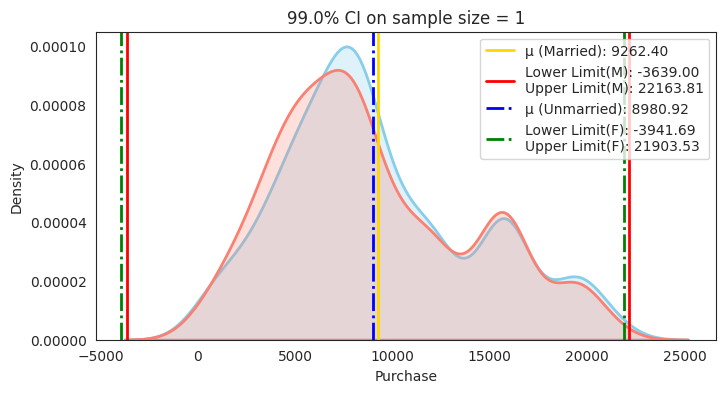

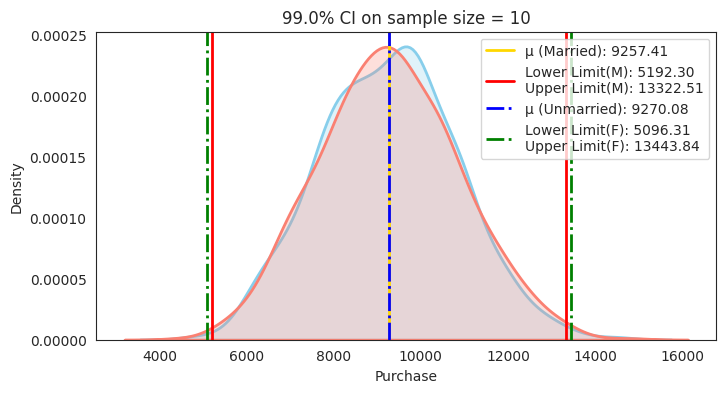

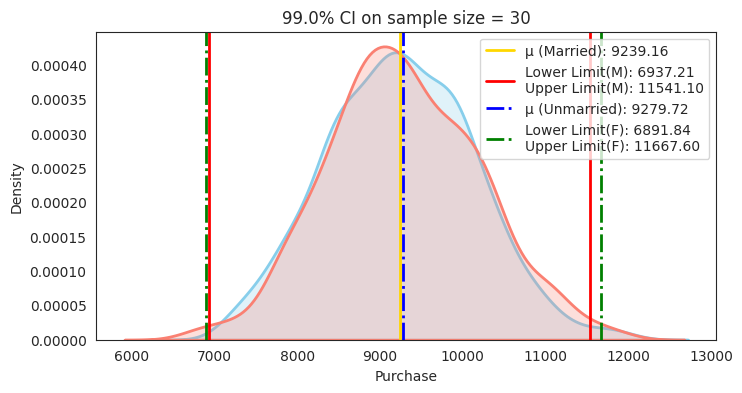

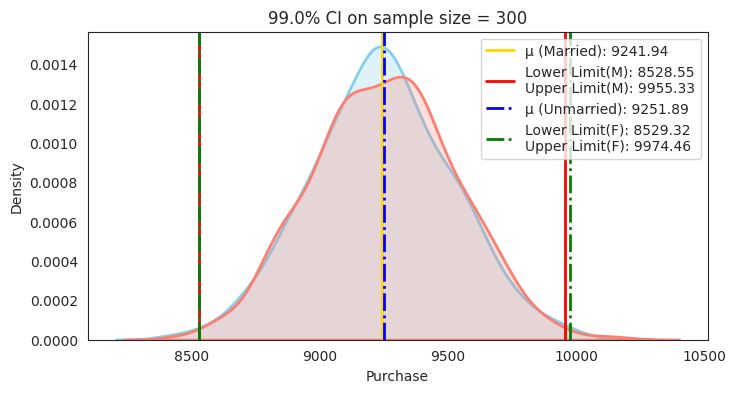

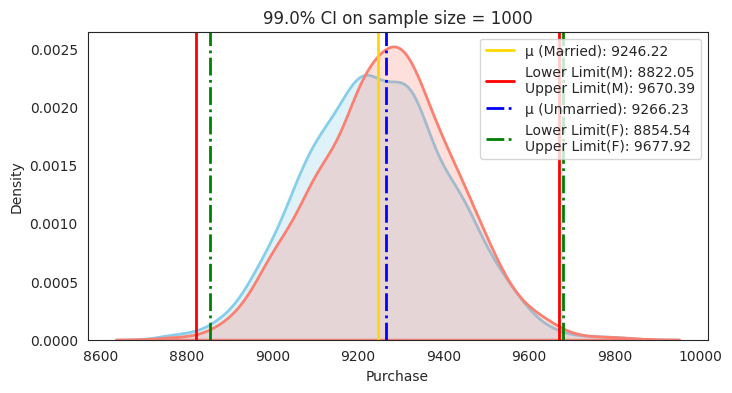

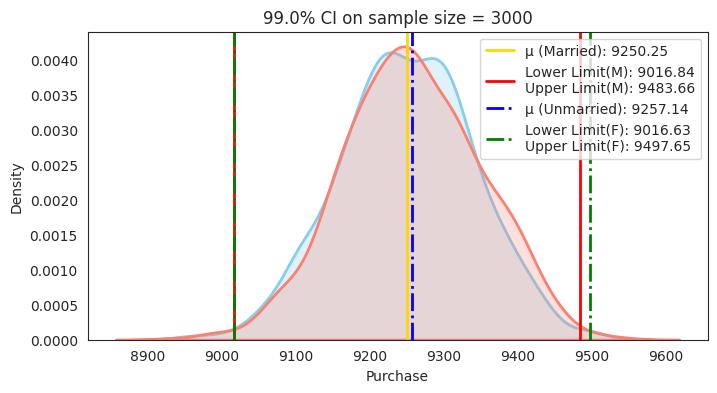

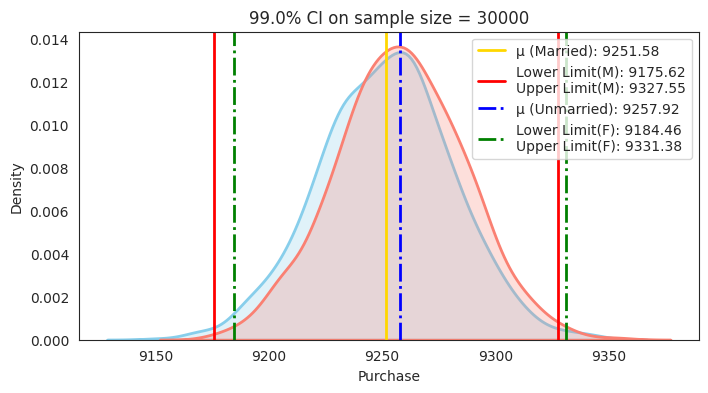

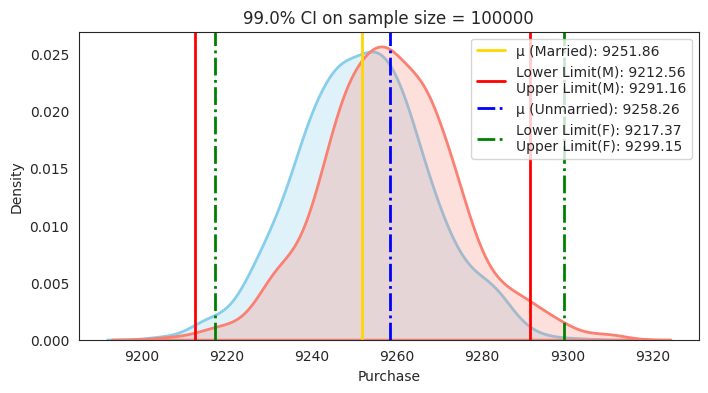

   Marital_Status  Lower_limit  Upper_limit  Sample_Size  \
0         Married     -3639.00     22163.81            1   
1       Unmarried     -3941.69     21903.53            1   
2         Married      5192.30     13322.51           10   
3       Unmarried      5096.31     13443.84           10   
4         Married      6937.21     11541.10           30   
5       Unmarried      6891.84     11667.60           30   
6         Married      8528.55      9955.33          300   
7       Unmarried      8529.32      9974.46          300   
8         Married      8822.05      9670.39         1000   
9       Unmarried      8854.54      9677.92         1000   
10        Married      9016.84      9483.66         3000   
11      Unmarried      9016.63      9497.65         3000   
12        Married      9175.62      9327.55        30000   
13      Unmarried      9184.46      9331.38        30000   
14        Married      9212.56      9291.16       100000   
15      Unmarried      9217.37      9299

In [65]:
iterations = 1000
size_list = [1, 10, 30, 300, 1000, 3000, 30000, 100000]
ci = 0.99

array = []

for sample_size in size_list:
    m_avg, u_avg, lower_limit_m, upper_limit_m, lower_limit_u, upper_limit_u = bootstrapping_marital_status_purchase(df_married, df_unmarried, sample_size, iterations, ci)

    # Append male data to array
    array.append(['Married', lower_limit_m, upper_limit_m, sample_size, [lower_limit_m, upper_limit_m], upper_limit_m - lower_limit_m, ci])

    # Append female data to array
    array.append(['Unmarried', lower_limit_u, upper_limit_u, sample_size, [lower_limit_u, upper_limit_u], upper_limit_u - lower_limit_u, ci])

# Create DataFrame from array
overlap = pd.DataFrame(array, columns=['Marital_Status', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])

# Display DataFrame
print(overlap)

In [66]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
6         Married      8528.55      9955.33          300  [8528.55, 9955.33]   
8         Married      8822.05      9670.39         1000  [8822.05, 9670.39]   
10        Married      9016.84      9483.66         3000  [9016.84, 9483.66]   
12        Married      9175.62      9327.55        30000  [9175.62, 9327.55]   
14        Married      9212.56      9291.16       100000  [9212.56, 9291.16]   

      Range  Confidence_pct  
6   1426.78            0.99  
8    848.34            0.99  
10   466.82            0.99  
12   151.93            0.99  
14    78.60            0.99

In [67]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status  Lower_limit  Upper_limit  Sample_Size                  CI  \
7       Unmarried      8529.32      9974.46          300  [8529.32, 9974.46]   
9       Unmarried      8854.54      9677.92         1000  [8854.54, 9677.92]   
11      Unmarried      9016.63      9497.65         3000  [9016.63, 9497.65]   
13      Unmarried      9184.46      9331.38        30000  [9184.46, 9331.38]   
15      Unmarried      9217.37      9299.15       100000  [9217.37, 9299.15]   

      Range  Confidence_pct  
7   1445.14            0.99  
9    823.38            0.99  
11   481.02            0.99  
13   146.92            0.99  
15    81.78            0.99

**Insights/Conclusion:**

* For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9215.99, 9298.6].

* For married customer (sample size 100000) range for mean purchase with confidence interval 99% is [9210.53, 9293.06].

#### Is there a significant difference in the width of the confidence intervals between marital statuses? Why?

The widths of the confidence intervals for both marital statuses appear to be approximately similar across different sample sizes and confidence levels. This suggests that the variability in purchasing behavior between married and unmarried individuals is not significantly different in this dataset.

#### How does the sample size influence the width of the confidence interval?

The width of the confidence interval tends to decrease as the sample size increases. This is because larger sample sizes provide more precise estimates of the population mean, resulting in narrower intervals.

#### Do the confidence intervals for marital status overlap across different sample sizes?

The confidence intervals for different sample sizes do overlap for both married and unmarried individuals. However, as the sample size increases, the overlap decreases, indicating greater precision in the estimates.

#### How does the sample size impact the distribution shape of the means for marital status?

With increasing sample size, the distribution of means becomes narrower and more symmetric around the population mean. This reflects the increasing accuracy and precision of the sample mean estimates as the sample size grows.

### **Conclusion:**

Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

# How does Age affect the amount spent?

In [68]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8925.539597
18-25    9164.189554
26-35    9244.947060
36-45    9320.888550
46-50    9198.531093
51-55    9519.560427
55+      9319.768741
Name: Purchase, dtype: float64

In [69]:
df.groupby('Age')['Purchase'].sum()

Age
0-17     1.347935e+08
18-25    9.133031e+08
26-35    2.030070e+09
36-45    1.025419e+09
46-50    4.203821e+08
51-55    3.665126e+08
55+      2.004123e+08
Name: Purchase, dtype: float64

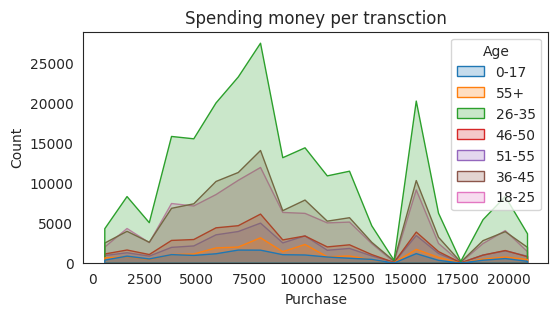

In [70]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Age", element="poly")
plt.title("Spending money per transction")
plt.show()

**Insights/Conclusion:**

* Age groups 26-35 and 36-45 have the highest average purchase amounts, indicating these age ranges are significant contributors to overall sales.
* While age group 18-25 has a relatively high total purchase amount, their average spending per individual is lower compared to older age groups, suggesting a larger customer base with lower individual spending.


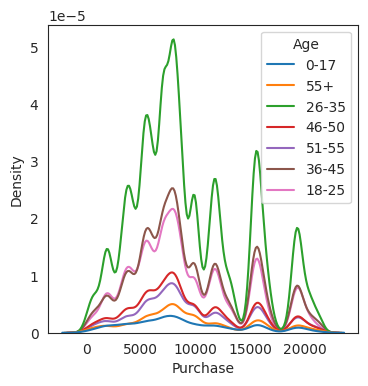

In [71]:
plt.figure(figsize=(4, 4))
sns.kdeplot(x = 'Purchase', data = df, hue='Age')
plt.show()

In [72]:
df_married = df[df['Marital_Status']==1]['Purchase']
df_unmarried = df[df['Marital_Status']==0]['Purchase']
print("Married customers are: ", df_married.shape[0])
print("Unmarried customers are: ", df_unmarried.shape[0])

Married customers are:  225337
Unmarried customers are:  324731


## Calculating CI (90%, 95%, 99%) using Bootstrapping for Puchases based on Age using CLT.

In [73]:
def bootstrapping_age_purchase(sample, sample_size=500, iterations=5000, confidence_level=0.95, age="0-17", no_of_tails=2):

    sample_means = np.empty(iterations)
    for i in range(iterations):
        sample_n = np.random.choice(sample, size=sample_size, replace=True)
        sample_means[i] = np.mean(sample_n)

    # Calculate the Z-Critical value
    alpha = (1 - confidence_level) / no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(sample_means)
    sigma = statistics.stdev(sample_means)

    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)

    fig, ax = plt.subplots(figsize=(14, 6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_means, color="#7A68A6", fill=True, linewidth=2)

    label_mean = ("μ: {:.2f}".format(mean))
    label_ult = ("Lower Limit: {:.2f}\nUpper Limit: {:.2f}".format(lower_limit, upper_limit))

    plt.title(f"{confidence_level * 100} CI on sample size {sample_size} for age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color='yellow', linestyle='solid', linewidth=2, label=label_mean)
    plt.axvline(upper_limit, color='red', linestyle='solid', linewidth=2, label=label_ult)
    plt.axvline(lower_limit, color='red', linestyle='solid', linewidth=2)
    plt.legend(loc='upper right')

    plt.show()

    return sample_means, np.round(lower_limit, 2), np.round(upper_limit, 2)


### Calculate 90% CI

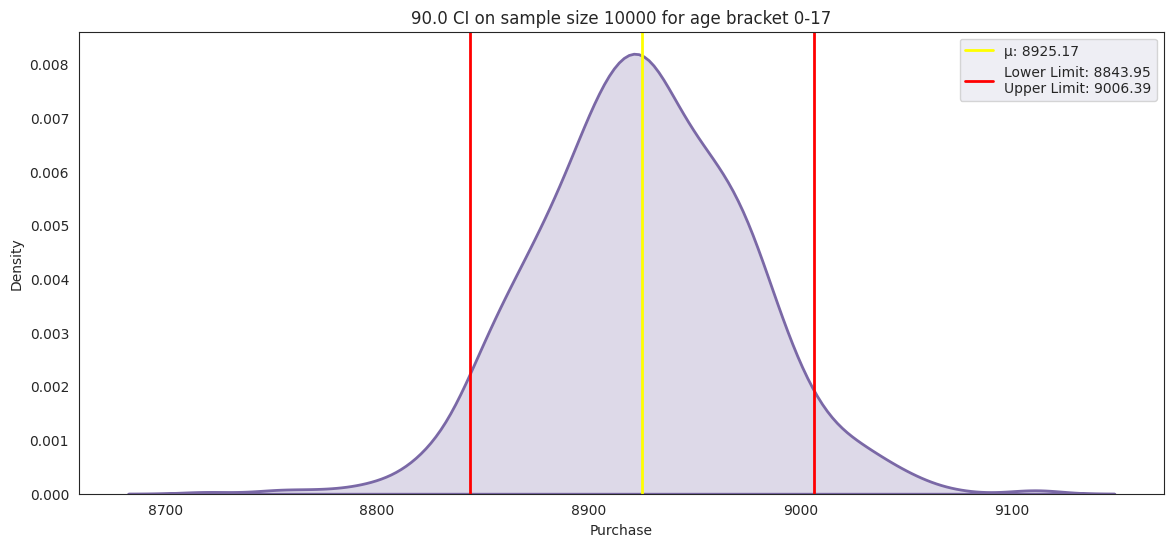

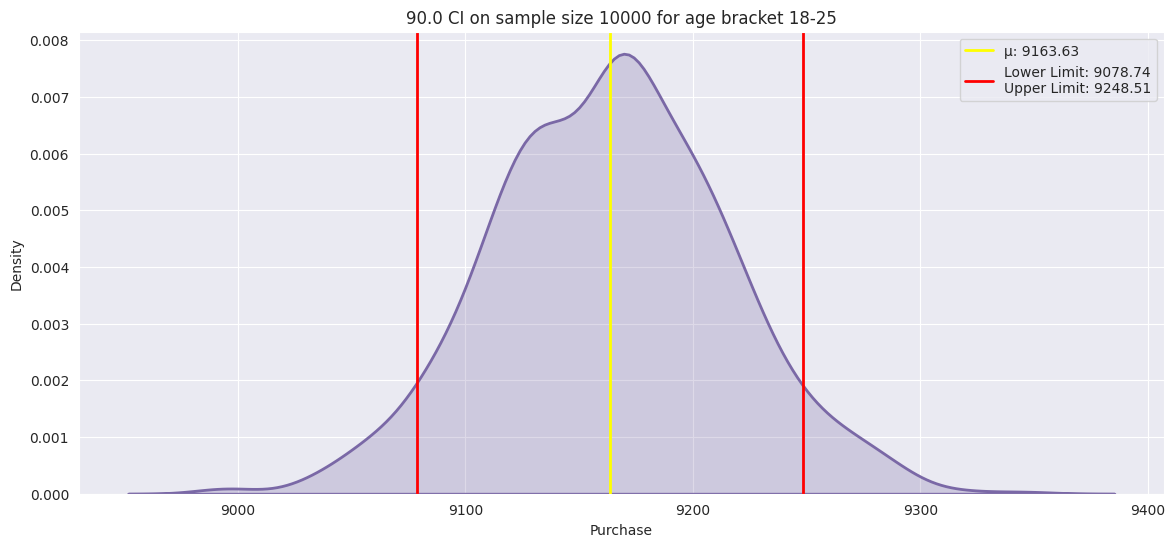

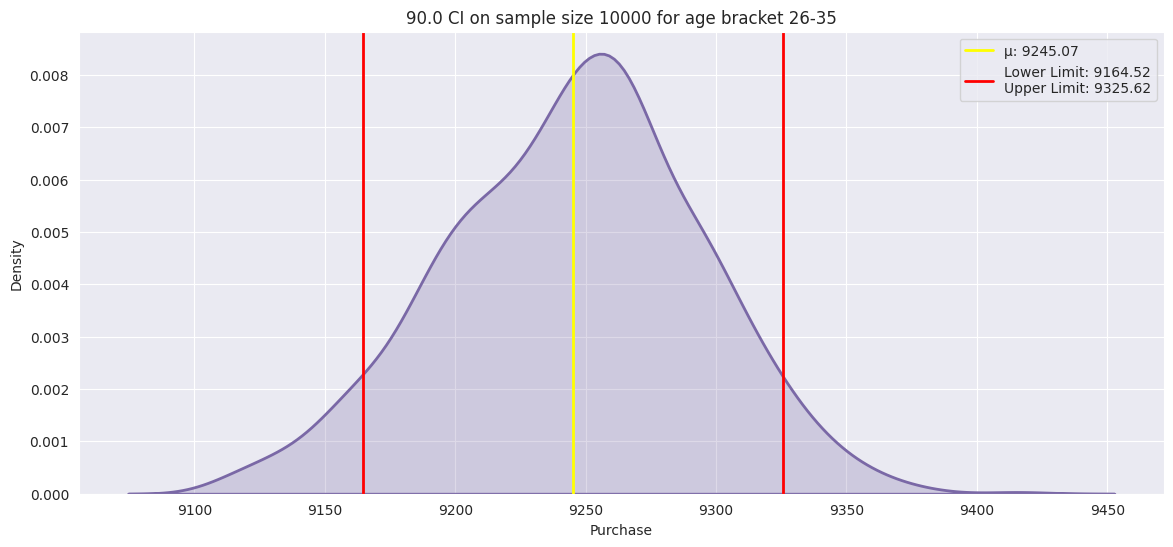

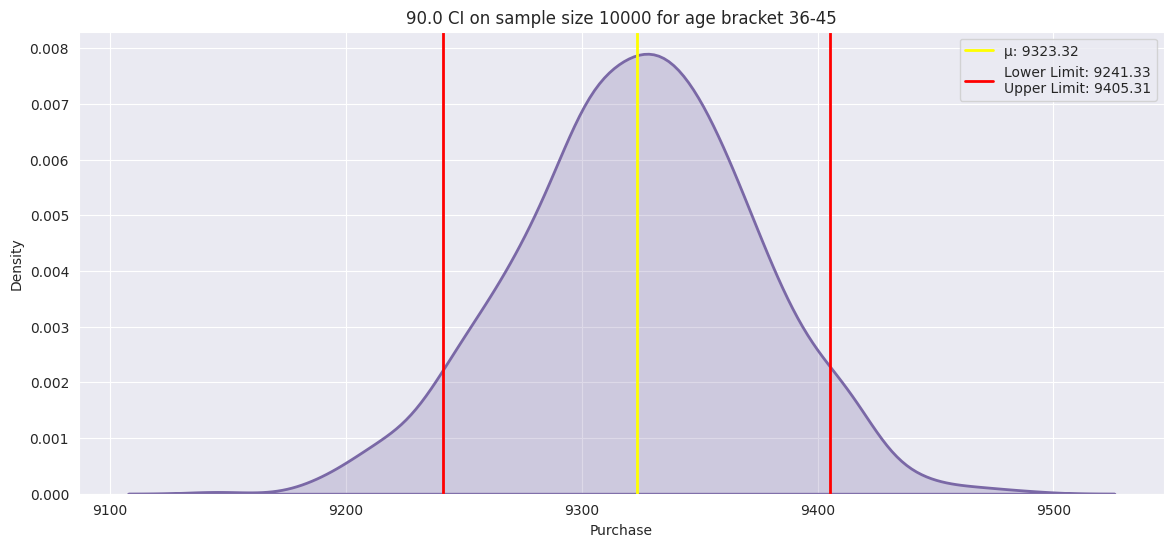

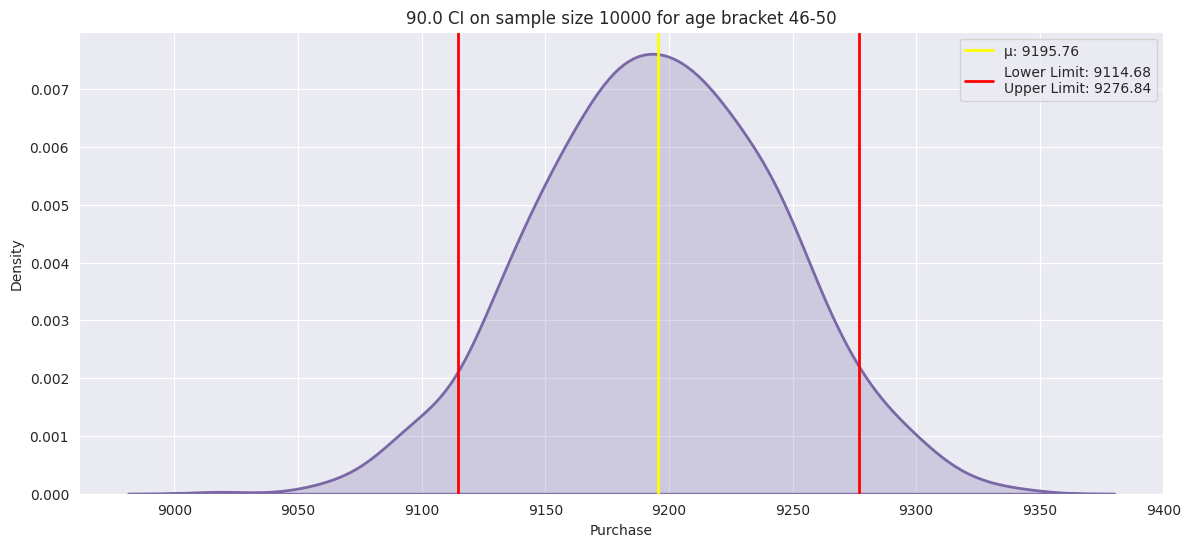

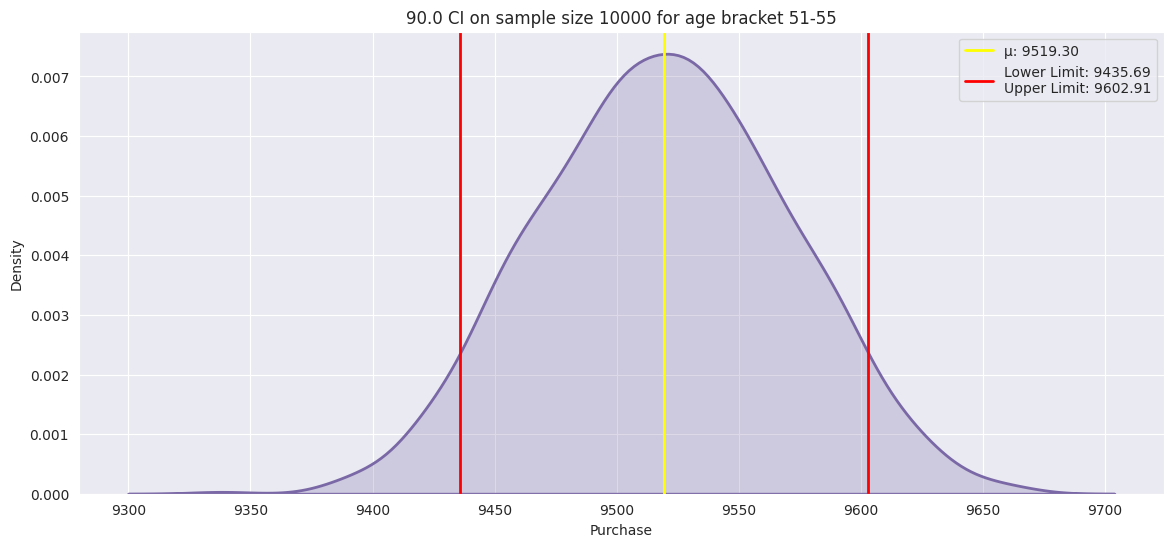

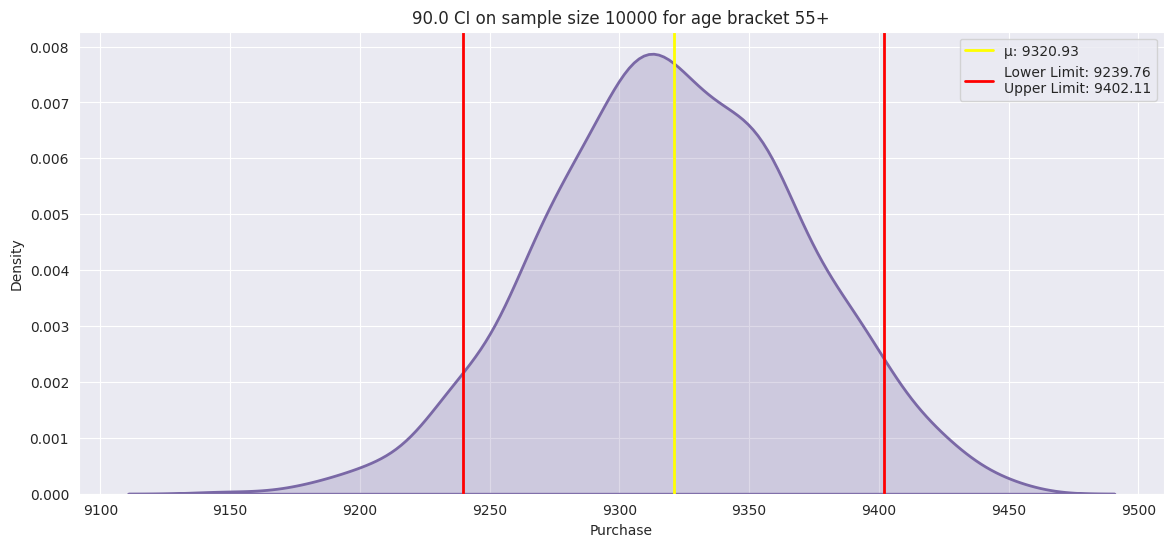

In [74]:
iterations = 1000
sample_size = 10000
ci = 0.90
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

data_rows = []

for age in age_list:
    mean, lower_limit, upper_limit = bootstrapping_age_purchase(df[df['Age'] == age]['Purchase'], sample_size, iterations, ci, age)

    data_rows.append([age, np.round(mean, 2), lower_limit, upper_limit, sample_size, [lower_limit, upper_limit], upper_limit - lower_limit, 90])

age_data = pd.DataFrame(data_rows, columns=['Age_Group', 'Mean', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])


#### Checking the Sampling distribution of a sample mean for each Age Group for 90% CI

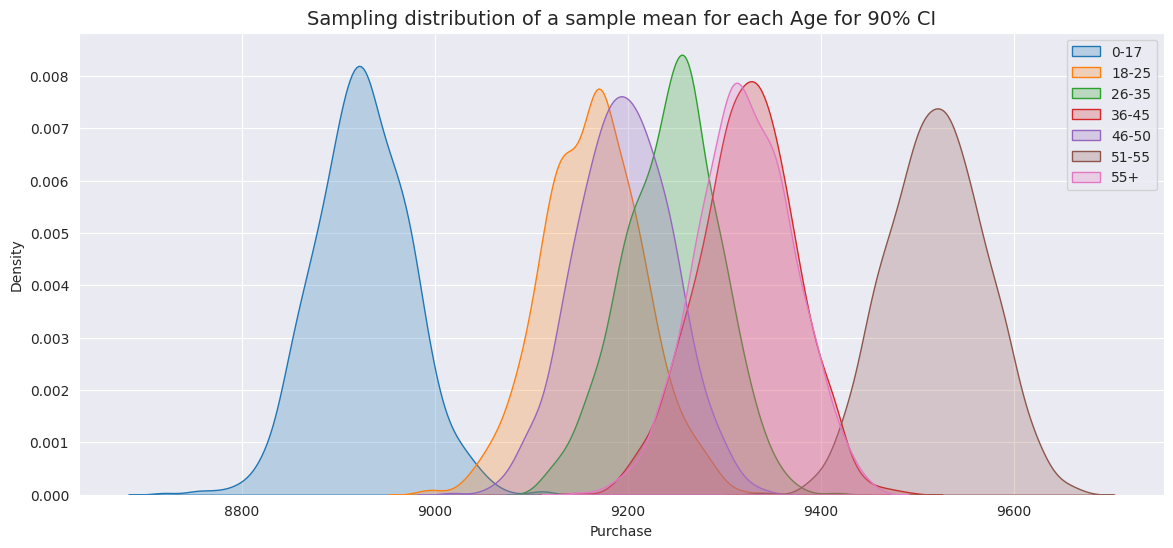

In [75]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 90% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [76]:
age_data

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8803.94, 8945.69, 8959.07, 8913.03, 8884.74, ...      8843.95   
1     18-25  [9222.13, 9145.81, 9088.08, 9197.53, 9108.65, ...      9078.74   
2     26-35  [9344.75, 9163.88, 9225.75, 9262.74, 9232.08, ...      9164.52   
3     36-45  [9241.44, 9237.68, 9404.33, 9374.62, 9287.94, ...      9241.33   
4     46-50  [9256.59, 9130.81, 9103.93, 9242.69, 9156.69, ...      9114.68   
5     51-55  [9531.71, 9563.2, 9478.09, 9531.47, 9529.72, 9...      9435.69   
6       55+  [9337.98, 9288.79, 9377.1, 9266.6, 9308.03, 93...      9239.76   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      9006.39        10000  [8843.95, 9006.39]  162.44              90  
1      9248.51        10000  [9078.74, 9248.51]  169.77              90  
2      9325.62        10000  [9164.52, 9325.62]  161.10              90  
3      9405.31        10000  [9241.33, 9405.31]  163.98              90  
4      9276.84        10000  [9114.68, 9276.84]  162.16              90  
5      9602.91        10000  [9435.69, 9602.91]  167.22              90  
6      9402.11        10000  [9239.76, 9402.11]  162.35              90

**Insights/Conclusion:**

* Spending by Age_group 0-17 is low compared to other age groups.

* Customers in Age_group 51-55 spend the most between [9236.56, 9398.94] for 90% CI.

### Calculate 95% CI

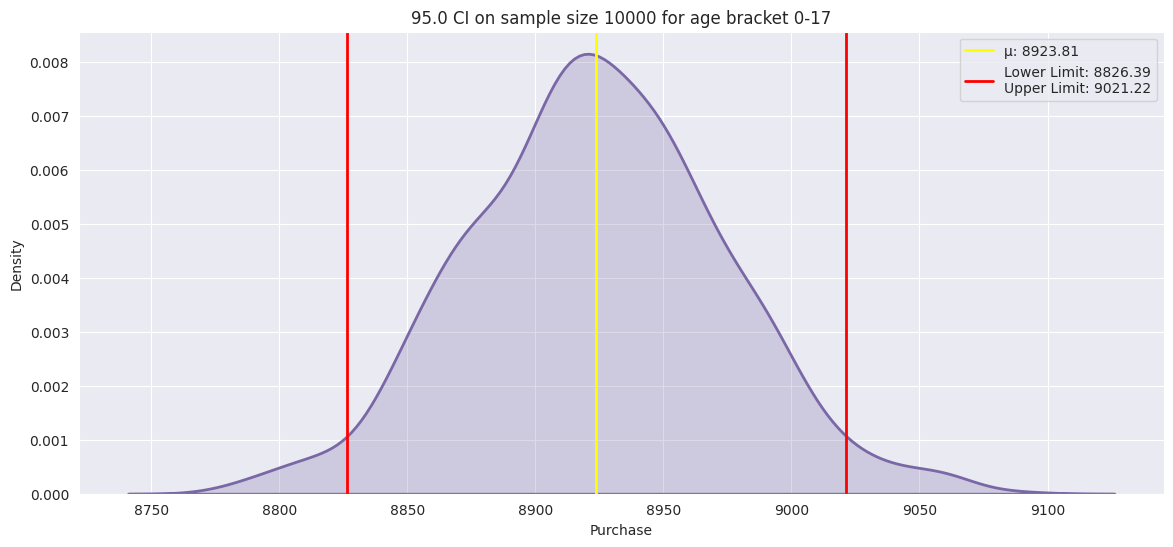

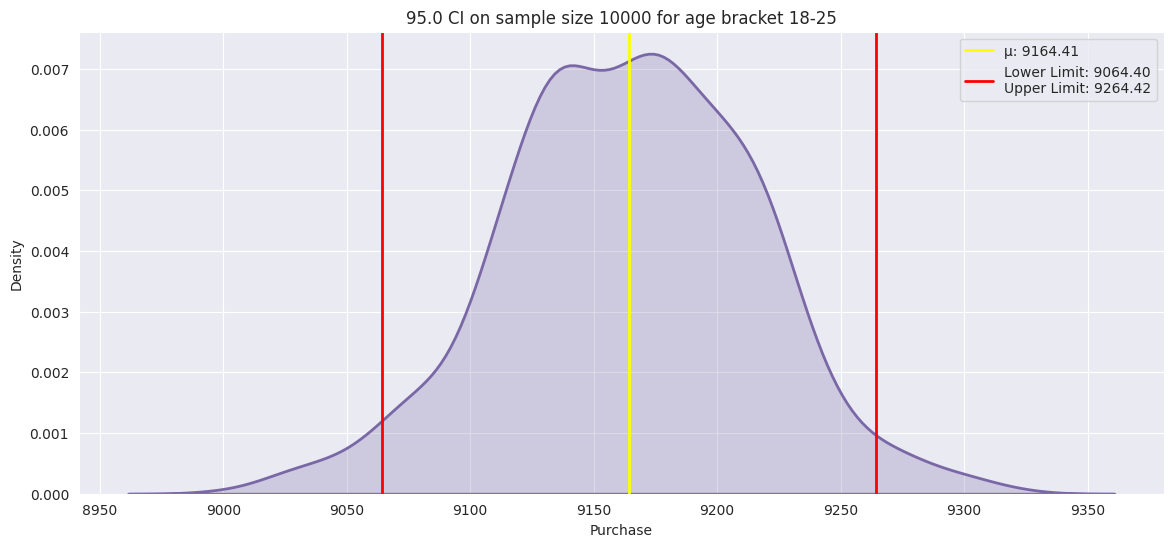

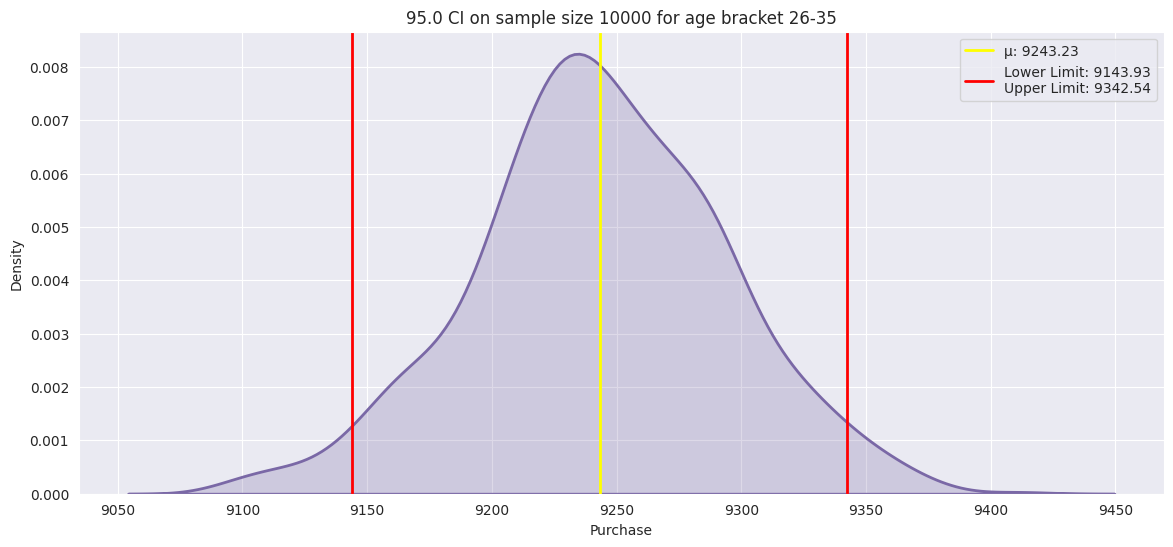

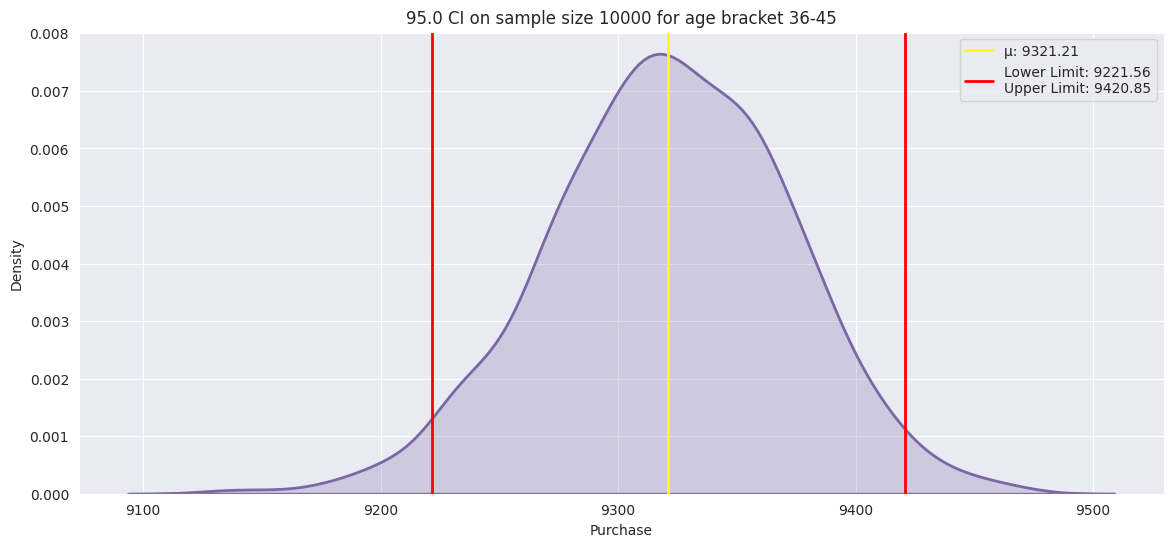

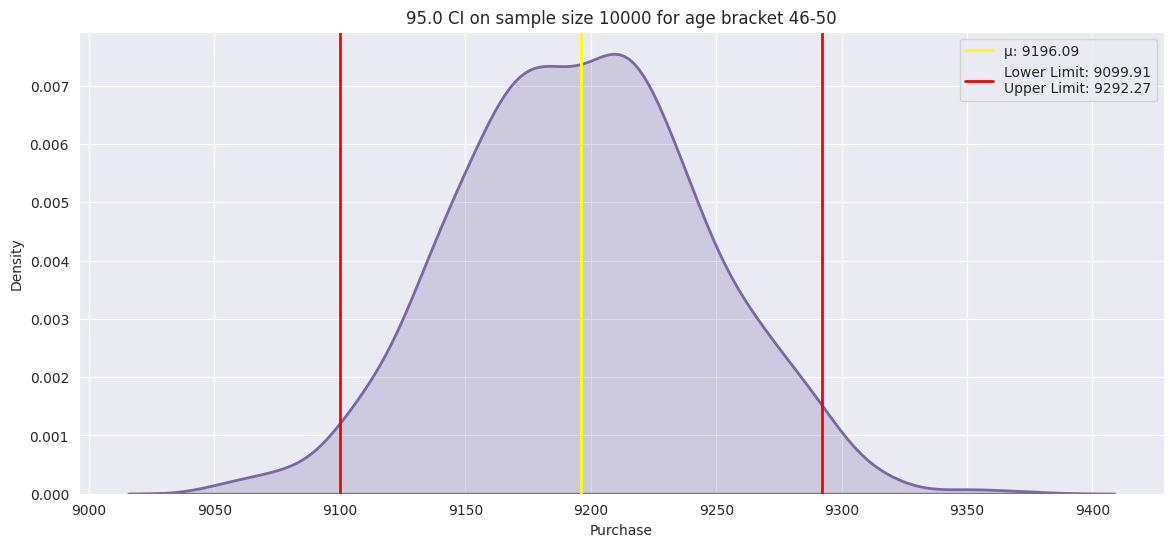

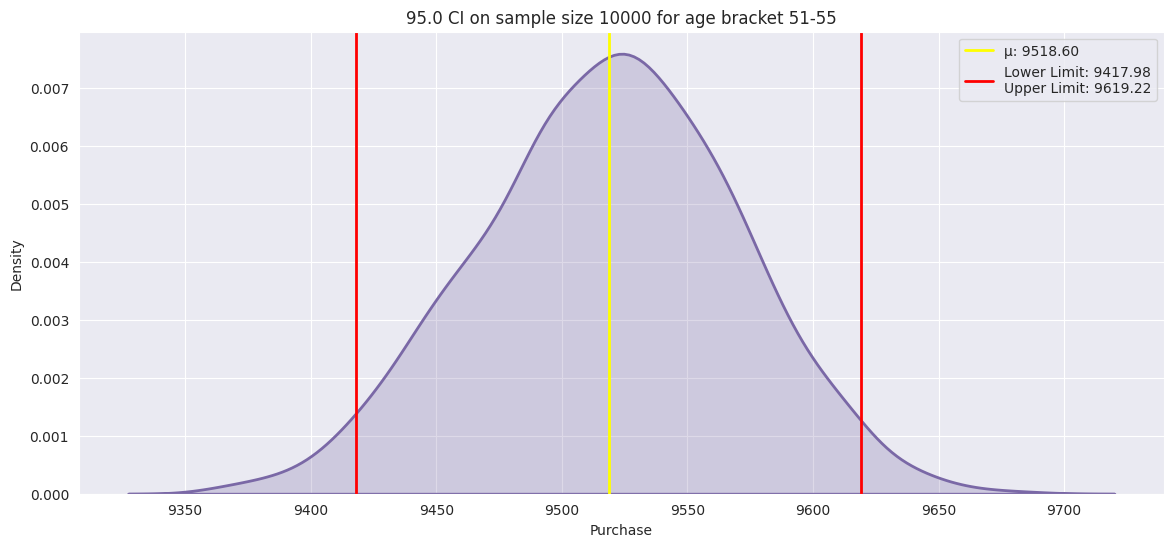

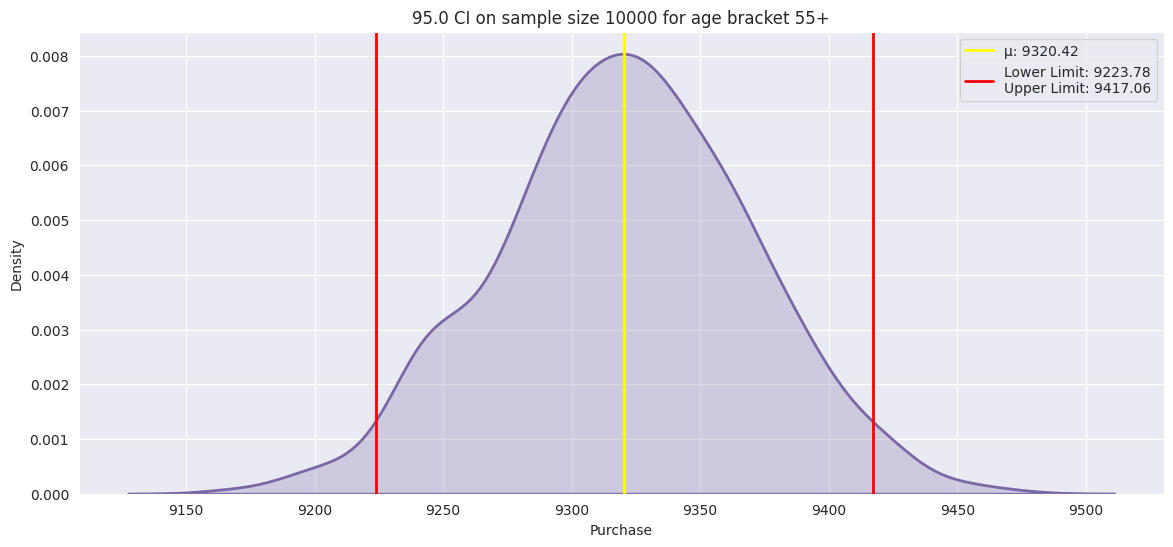

In [77]:
iterations = 1000
sample_size = 10000
ci = 0.95
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

data_rows = []

for age in age_list:
    mean, lower_limit, upper_limit = bootstrapping_age_purchase(df[df['Age'] == age]['Purchase'], sample_size, iterations, ci, age)

    data_rows.append([age, np.round(mean, 2), lower_limit, upper_limit, sample_size, [lower_limit, upper_limit], upper_limit - lower_limit, 95])

age_data = pd.DataFrame(data_rows, columns=['Age_Group', 'Mean', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])


#### Checking the Sampling distribution of a sample mean for each Age Group for 95% CI

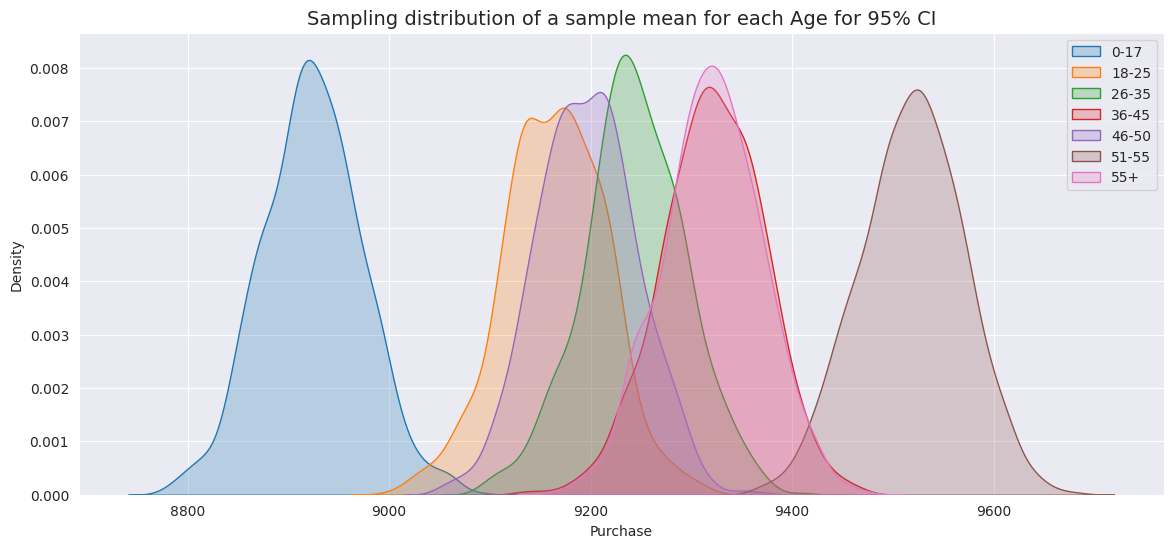

In [78]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 95% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [79]:
age_data

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8971.14, 8880.65, 8940.03, 8893.44, 8902.49, ...      8826.39   
1     18-25  [9078.0, 9230.12, 9176.97, 9114.56, 9090.34, 9...      9064.40   
2     26-35  [9231.04, 9169.09, 9307.76, 9274.92, 9286.71, ...      9143.93   
3     36-45  [9328.31, 9228.86, 9333.0, 9285.29, 9302.62, 9...      9221.56   
4     46-50  [9196.2, 9212.83, 9220.49, 9106.91, 9196.49, 9...      9099.91   
5     51-55  [9521.47, 9491.91, 9536.51, 9427.07, 9516.84, ...      9417.98   
6       55+  [9358.64, 9323.01, 9364.21, 9385.35, 9261.13, ...      9223.78   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      9021.22        10000  [8826.39, 9021.22]  194.83              95  
1      9264.42        10000   [9064.4, 9264.42]  200.02              95  
2      9342.54        10000  [9143.93, 9342.54]  198.61              95  
3      9420.85        10000  [9221.56, 9420.85]  199.29              95  
4      9292.27        10000  [9099.91, 9292.27]  192.36              95  
5      9619.22        10000  [9417.98, 9619.22]  201.24              95  
6      9417.06        10000  [9223.78, 9417.06]  193.28              95

**Insights/Conclusion:**

* Spending by Age_group 0-17 is low compared to other age groups.

* Customers in Age_group 51-55 spend the most between [9223.78, 9417.81]	 for 95% CI.

### Calculate 99% CI

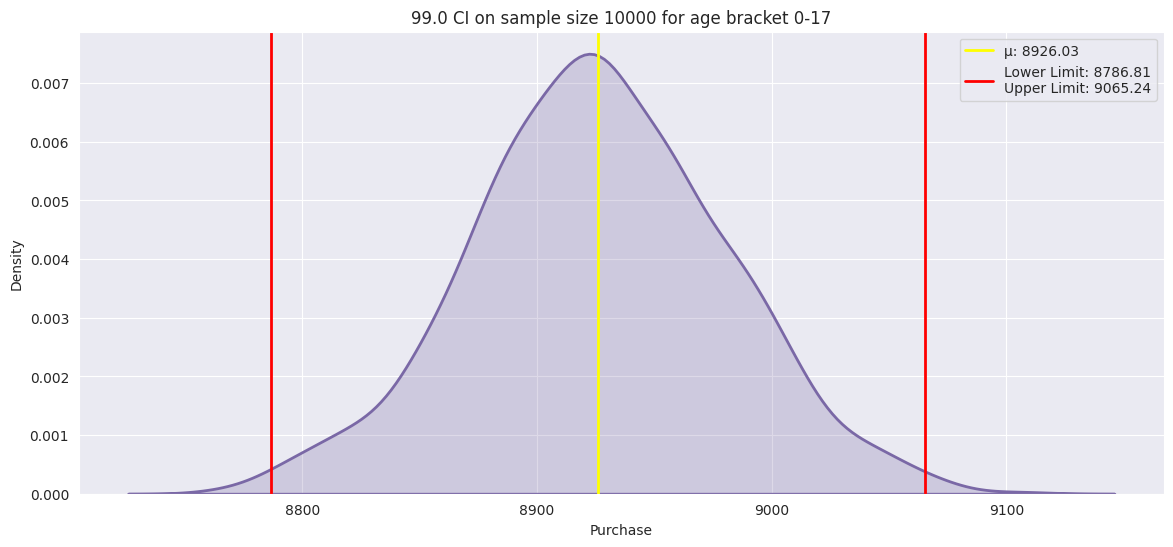

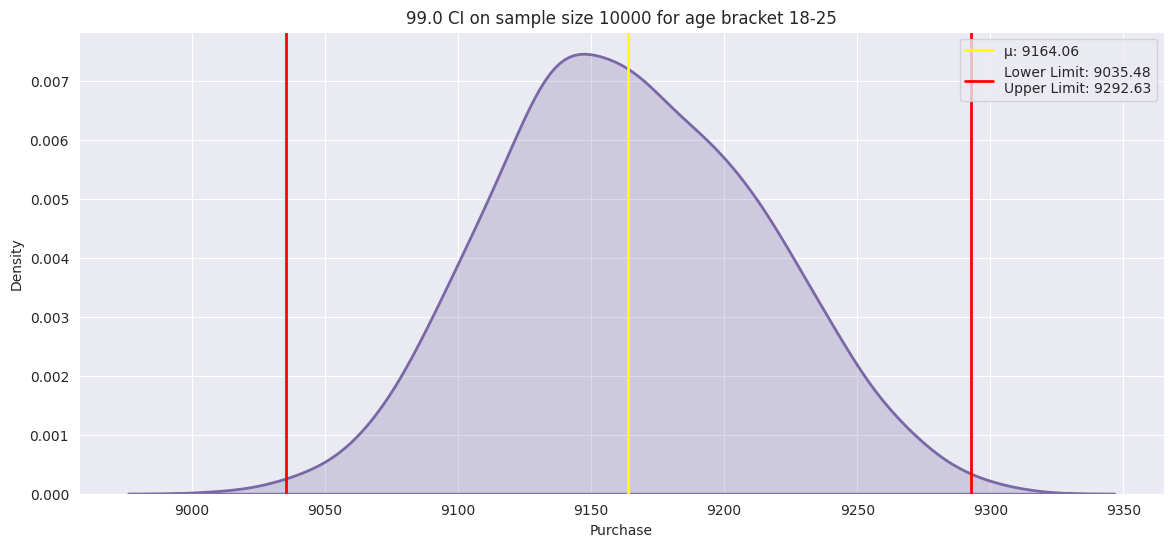

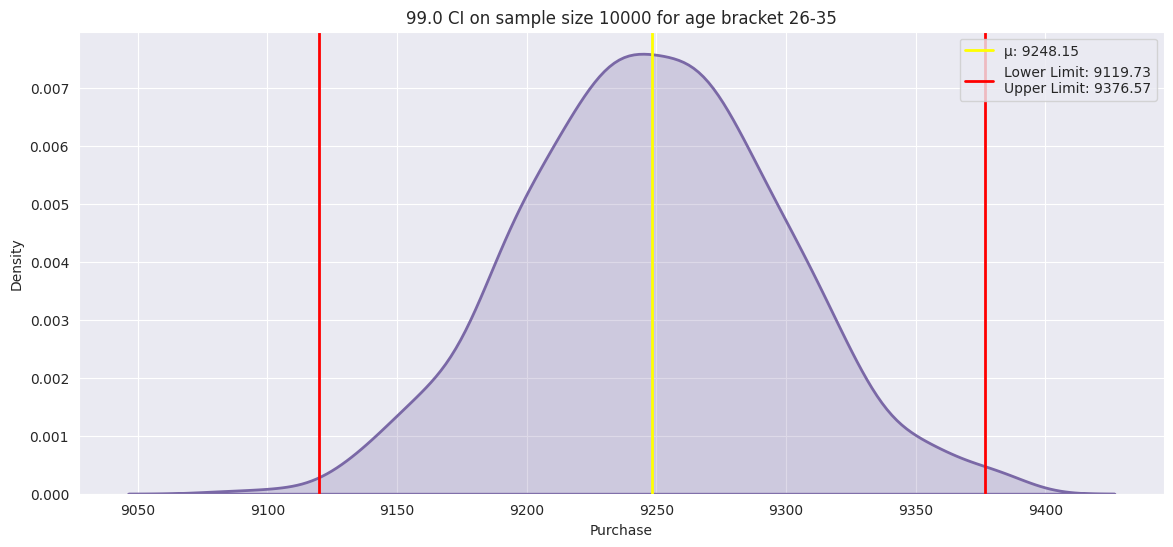

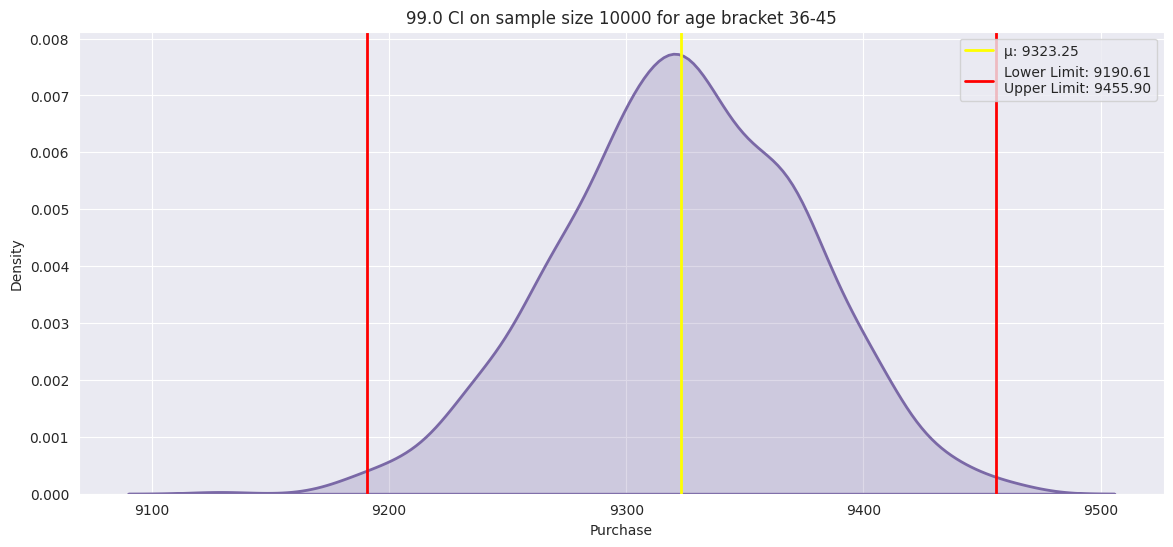

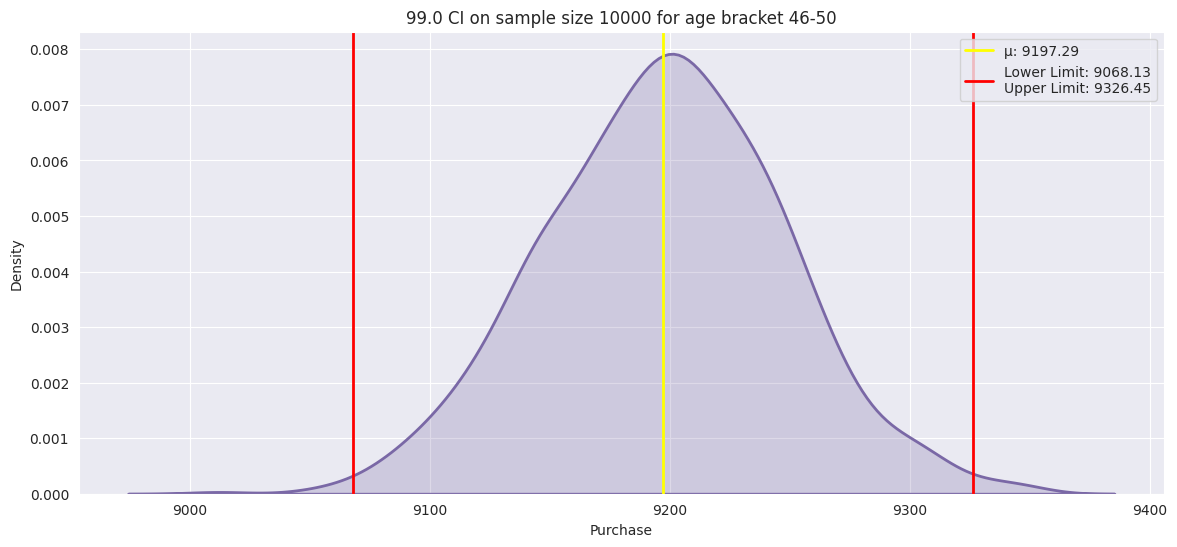

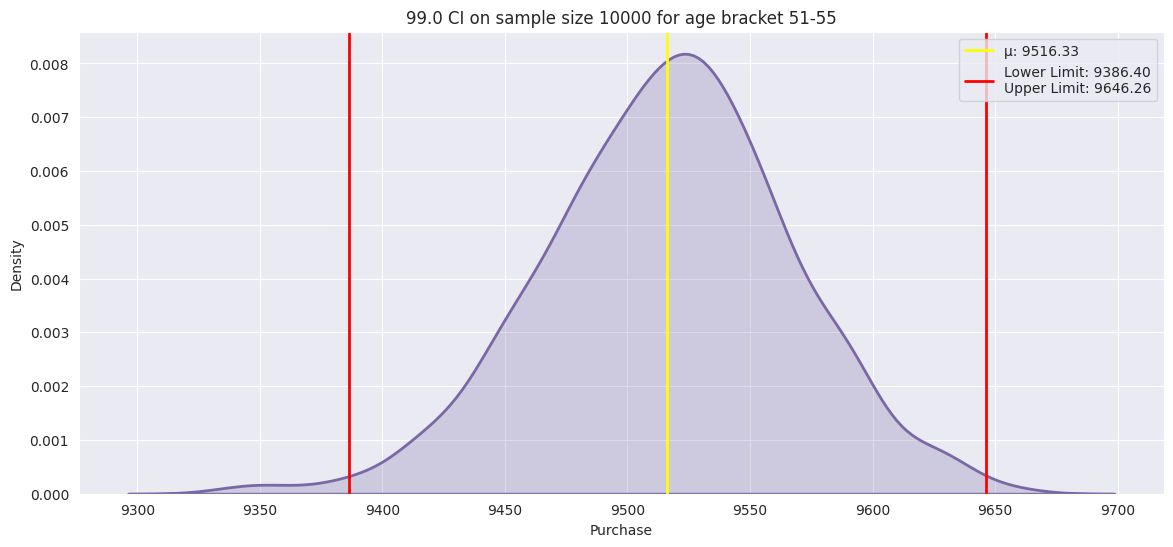

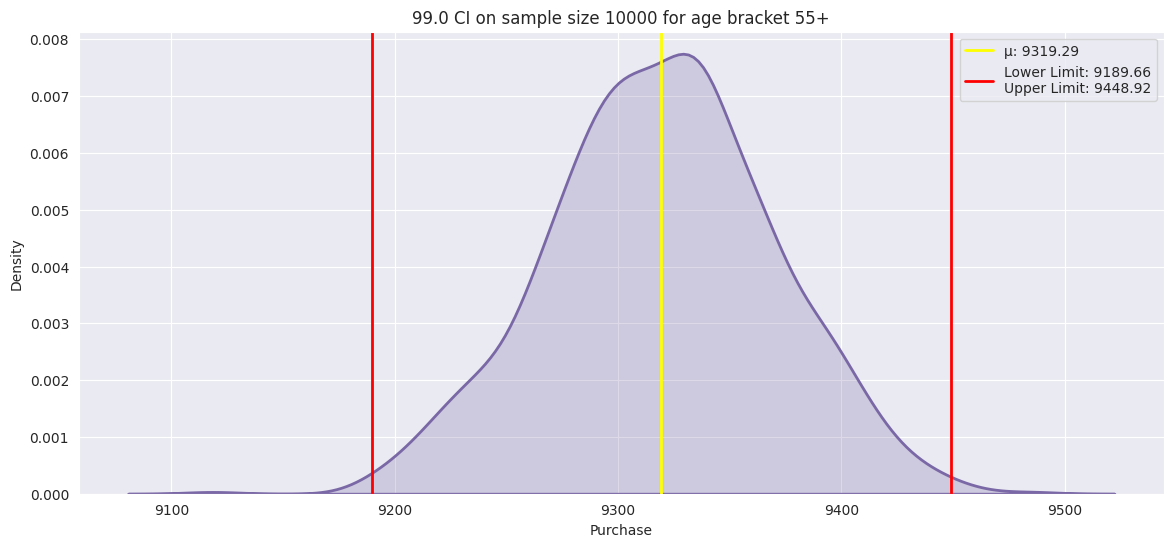

In [80]:
iterations = 1000
sample_size = 10000
ci = 0.99
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

data_rows = []

for age in age_list:
    mean, lower_limit, upper_limit = bootstrapping_age_purchase(df[df['Age'] == age]['Purchase'], sample_size, iterations, ci, age)

    data_rows.append([age, np.round(mean, 2), lower_limit, upper_limit, sample_size, [lower_limit, upper_limit], upper_limit - lower_limit, 99])

age_data = pd.DataFrame(data_rows, columns=['Age_Group', 'Mean', 'Lower_limit', 'Upper_limit', 'Sample_Size', 'CI', 'Range', 'Confidence_pct'])


#### Checking the Sampling distribution of a sample mean for each Age Group for 99% CI

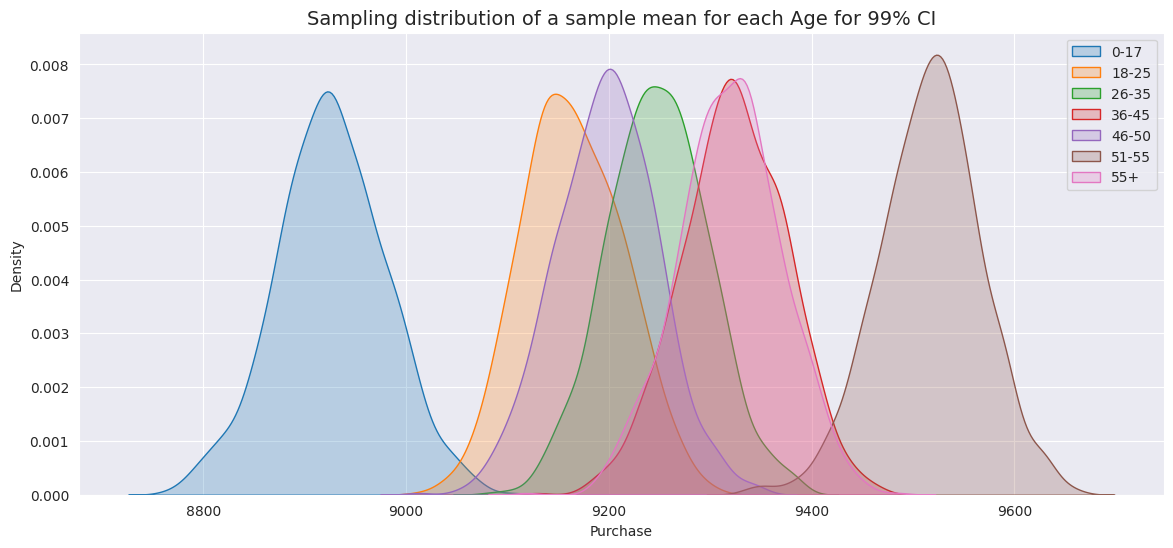

In [81]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 99% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [82]:
age_data

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8914.79, 8881.01, 8926.09, 8992.4, 8926.84, 8...      8786.81   
1     18-25  [9208.19, 9161.72, 9209.76, 9234.2, 9147.75, 9...      9035.48   
2     26-35  [9201.3, 9174.88, 9199.34, 9266.07, 9185.92, 9...      9119.73   
3     36-45  [9329.45, 9303.01, 9295.08, 9301.08, 9317.29, ...      9190.61   
4     46-50  [9254.5, 9143.91, 9264.66, 9192.69, 9110.93, 9...      9068.13   
5     51-55  [9628.24, 9494.03, 9543.46, 9502.22, 9527.25, ...      9386.40   
6       55+  [9267.07, 9313.54, 9361.25, 9195.0, 9375.73, 9...      9189.66   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      9065.24        10000  [8786.81, 9065.24]  278.43              99  
1      9292.63        10000  [9035.48, 9292.63]  257.15              99  
2      9376.57        10000  [9119.73, 9376.57]  256.84              99  
3      9455.90        10000   [9190.61, 9455.9]  265.29              99  
4      9326.45        10000  [9068.13, 9326.45]  258.32              99  
5      9646.26        10000   [9386.4, 9646.26]  259.86              99  
6      9448.92        10000  [9189.66, 9448.92]  259.26              99

**Insights/Conclusion:**

* Spending by Age_group 0-17 is low compared to other age groups.

* Customers in Age_group 51-55 spend the most between [9191.1, 9442.16] for 99% CI.

#### Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?

No, the confidence intervals have similar widths across age groups. Despite potential variation, the ranges remain comparable, indicating consistent precision in estimating means across different age groups in the dataset.

#### How is the width of the confidence interval affected by the sample size?

The width of the confidence interval is inversely proportional to the square root of the sample size. As the sample size increases, the standard error of the mean decreases, resulting in a narrower confidence interval.

#### Do the confidence intervals for different sample sizes overlap?


Confidence intervals for different sample sizes overlap inconsistently across age groups. While some intervals overlap, like 18-25 and 51-55, others, like 0-17 and 55+, don't. This suggests varied purchasing behavior across age demographics.

#### How does the sample size affect the shape of the distributions of the means?

Increasing the sample size tends to make the distribution of the means narrower and more symmetric around the population mean. With larger sample sizes, the distribution becomes more concentrated, with less variability and fewer extreme values. As a result, the shape of the distribution becomes closer to a normal distribution.

### **Conclusion:**

The confidence intervals for different sample sizes inconsistently overlap across age groups. While intervals like 18-25 and 51-55 overlap, others like 0-17 and 55+ don't, indicating diverse purchasing behavior across age demographics.

# Report

### Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

The confidence intervals for the average amount spent by males and females (computed using all the data) do not overlap. This suggests a significant difference in the average amount spent between the two genders.

Walmart can tailor marketing strategies based on gender-specific spending patterns. For instance:

* **Targeted Marketing:** Customize ads and promotions to match spending habits of each gender.
* **Product Placement:** Optimize store layout by placing gender-specific products in relevant areas.
* **Personalized Recommendations:** Use customer data to offer tailored product suggestions, enhancing satisfaction and sales.

### Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

The confidence intervals for the average amount spent by married and unmarried individuals overlap, indicating no significant difference in spending habits based on marital status. Walmart can use this insight to tailor marketing strategies and product offerings to a broader audience without focusing solely on marital status.

### Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

The confidence intervals for average spending across different age groups show both overlapping and non-overlapping intervals, indicating diverse spending patterns. Walmart can tailor marketing strategies, product offerings, and promotions to target specific age demographics based on their distinct spending behaviors, optimizing customer engagement and sales.

# Final Insights

**Based on EDA**

*  City Category B attracts the majority of customers, but City Category C sees higher spending with a mean purchase of 9719.

*  The 5K - 20K range is where most purchases occur, indicating a preference for mid-range spending among customers.

*  Men make significantly more purchases than women, with 75% of male customers compared to only 25% of female customers.


*  The age group of 26-35 dominates mall customers, with 60% of purchases made by individuals aged 26-45.


*  City Category B represents 42%, City Category C 31%, and City Category A 27% of purchases, with City Category C showing notably high purchase rates.


*  City Category C has a higher concentration of female customers compared to other categories.
Products 5 and 8 are particularly popular among female customers.


*  Product Category B is favored by the age group 55+.


*  The ratio of married to unmarried customers is 58:42, indicating a significant presence of married individuals.


**Based on CLT and CI**

*  The analysis reveals distinct spending patterns between genders, with females consistently spending less than males across different confidence intervals.

  *  For example, with a 95\% confidence interval, the mean purchase range for females is [8696.27, 8756.56], while for males it is [9396.46, 9460.99].

*  Marital status does not significantly impact spending habits, as indicated by overlapping confidence intervals for married and unmarried individuals.

 *  For instance, with a 99\% confidence interval, the mean purchase range for unmarried customers is [9215.99, 9298.6], and for married customers it is [9210.53, 9293.06].

*  Spending varies across different age groups, with the 51-55 age group consistently showing higher spending compared to others, regardless of the confidence interval.

  *  For example, with a 90\% confidence interval, the mean purchase range for customers aged 51-55 is [9236.56, 9398.94].

# Recommendations

*  **Targeted Offers for Women:** According to the data, women spend less than men on average, so management must address their individual demands differently. Adding some additional offers for women can increase their spending on Black Friday.

*  **Youth Engagement:** Management should develop customized offers for kids (0-17 years) to boost sales, as this age group shows the lowest mean purchase. Additionally, discounts and subscriptions for video games can be introduced to appeal to the younger generation.

*  **Married Customer Focus:** Married customers outnumber single customers. However, according to the data, single customers tend to make more purchases than married customers. Management should focus more on married customers because they are large in number but spending less.

*  **Product Diversification for Seniors:** Product Category B is in high demand among people in 55+ age group. There is a sudden drop in other categories A & C for the same age group. Management needs to focus more on other categories for the 55+ age group.

*  **Research on Long-Term Customers:** The majority of customers who stayed in the same city for more than 2 years made somewhat lower average purchases. Management needs to do research for all stores to determine why it is low.

*  **Enhanced Inventory for Popular Categories:** Product categories 5 and 8 are in high demand among females. In order to increase sales, management needs to introduce more items of these product categories in their stores.

*  **Customer Survey for Insights:** Management should conduct a survey of different age groups to find out what they appreciate best about a specific brand or product category. This will help businesses with customer acquisition and retention.

*  **Strategic Offers for Popular Categories:** As product categories 1 & 5 are popular among both male and female, management must provide extra offers and implement a cross-selling or upselling strategy to improve sales.

*  I**nvestigation on Low-Demand Categories:** Management needs to figure out why product categories 9 and 17 are underperforming. If customers dislike this product, it needs to be eliminated from inventory by lowering the price.

*  **Utilize Black Friday Insights:** As this dataset is based on Black Friday sales, it is evident that specific age groups and product categories will have higher demand and churn. Management can derive insights from the analysis for the customer purchase behavior.
